# Rotten tomatoes 

ANÁLISIS ULTRA MEJORADO - ROTTEN TOMATOES FRANKENSTEIN

📖 Leyendo: Top_Critics_20260214_153950.xlsx
   ✓ 803 reseñas
📖 Leyendo: User_Reviews_20260214_143815.xlsx
   ✓ 172 reseñas

📊 Total: 975 reseñas

👤 NOMBRES PROPIOS (detectados como unidad completa)
  guillermo del toro             →  113 veces
  jacob elordi                   →   50 veces
  mia goth                       →   39 veces
  mary shelley                   →   14 veces
  oscar isaac                    →    6 veces

🔤 PALABRAS INDIVIDUALES (excluidos nombres propios y palabras vacías)

Top 25:

  monster                   →  208 veces
  gothic                    →  136 veces
  gorgeous                  →  122 veces
  creature                  →  100 veces
  director                  →   89 veces
  creation                  →   86 veces
  netflix                   →   82 veces
  soul                      →   82 veces
  though                    →   81 veces
  creator                   →   81 veces
  project                

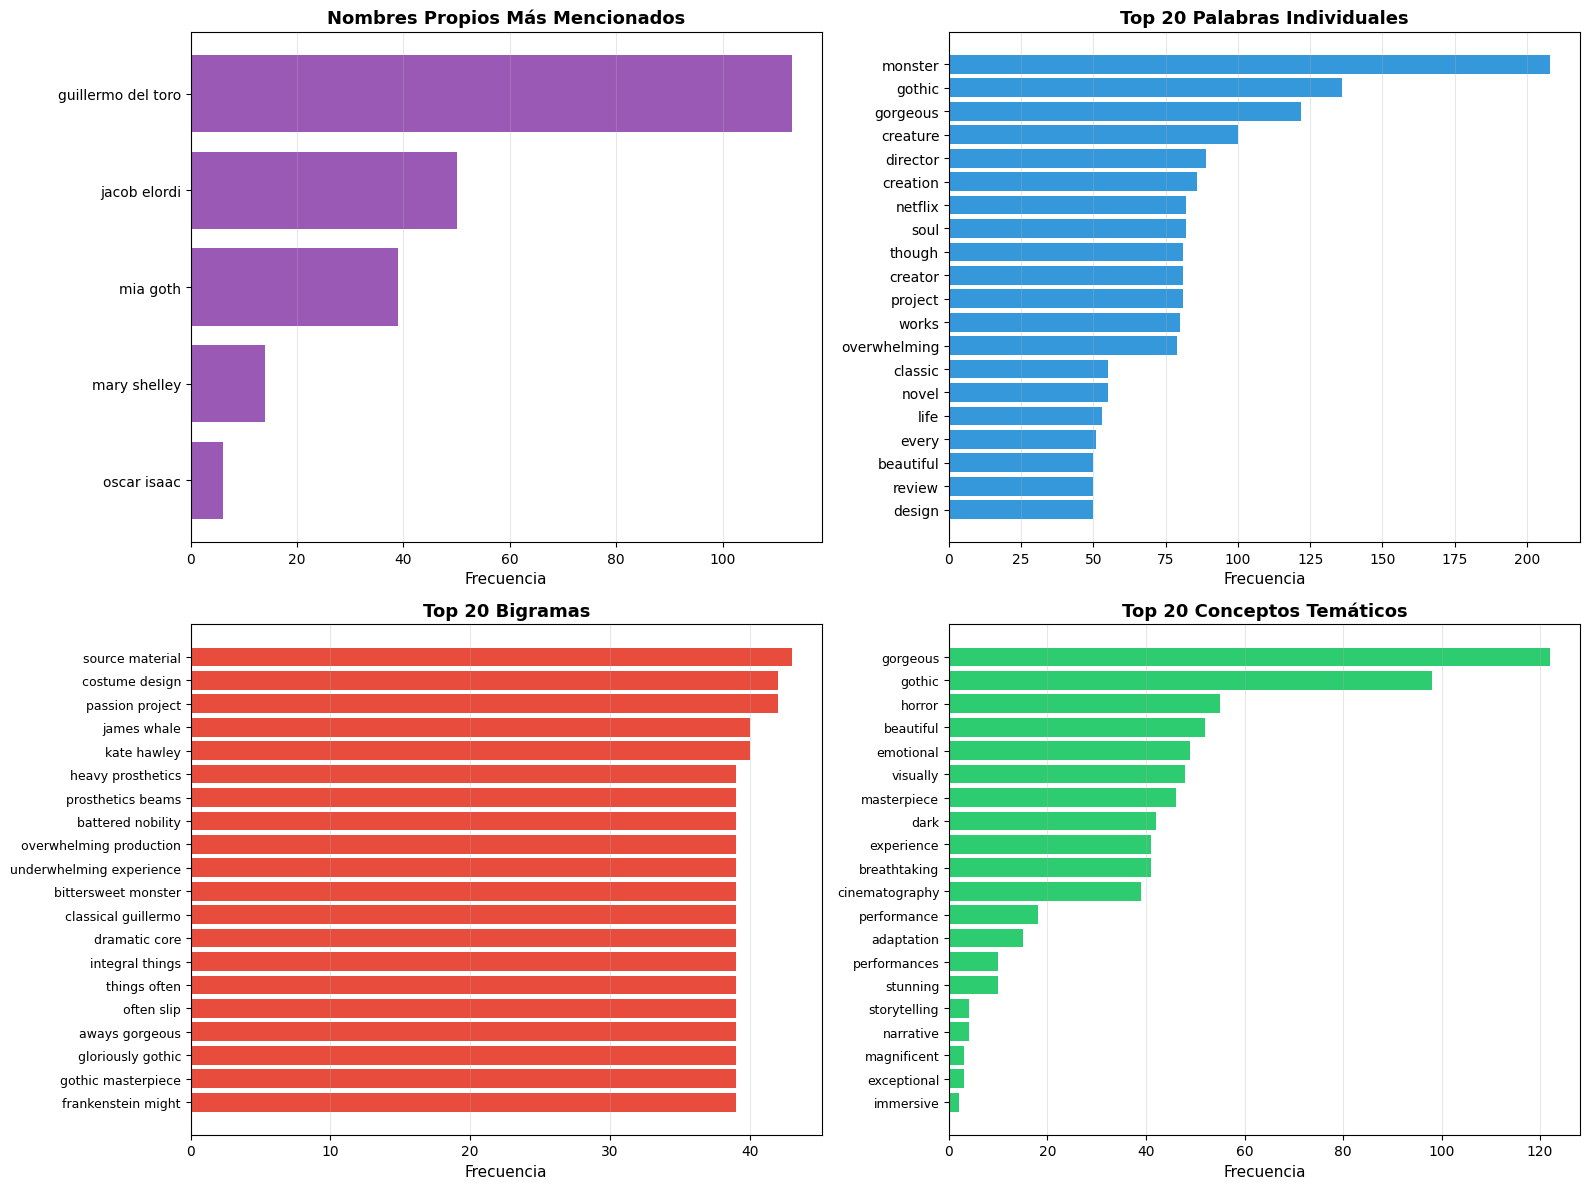

In [4]:
"""
Análisis ULTRA MEJORADO de palabras frecuentes
Con detección inteligente de nombres y filtrado de fragmentos sin sentido
"""

import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import matplotlib.pyplot as plt

try:
    nltk.data.find('corpora/stopwords')
except:
    nltk.download('stopwords', quiet=True)

class UltraReviewAnalyzer:
    def __init__(self, files):
        self.files = files
        self.stop_words = set(stopwords.words('english'))
        
        # STOPWORDS AMPLIADAS
        custom_stops = {
            # Palabras de cine
            'film', 'movie', 'films', 'movies', 'one', 'like', 'get', 'make', 
            'see', 'go', 'really', 'much', 'even', 'also', 'would', 'could', 
            'well', 'time', 'way', 'look', 'scene', 'scenes', 'story', 'stories',
            'year', 'years', 'watch', 'watching', 'watched', 'version', 'versions',
            
            # Palabras sueltas sin sentido
            'del', 'toro', 'has', 'been', 'always', 'still', 'many', 'full',
            'end', 'kind', 'feels', 'think', 'truly', 'half', 'hour', 'run',
            'underneath', 'the', 'and', 'this', 'that', 'these', 'those',
            'bare', 'bones', 'expected', 'conclusion', 'softens', 'edges',
            'vision', 'simplifying', 'complex', 'volatile', 'dynamic',
            'instead', 'shackled', 'trudging', 'through', 'remains',
            
            # Adjetivos muy genéricos
            'good', 'great', 'bad', 'best', 'better', 'worse', 'worst',
        }
        self.stop_words.update(custom_stops)
        
        # NOMBRES PROPIOS COMPLETOS (detectar y contar como unidad)
        self.proper_names = {
            'guillermo del toro': ['guillermo', 'del', 'toro'],
            'jacob elordi': ['jacob', 'elordi'],
            'mia goth': ['mia', 'goth'],
            'oscar isaac': ['oscar', 'isaac'],
            'christoph waltz': ['christoph', 'waltz'],
            'mary shelley': ['mary', 'shelley'],
            'victor frankenstein': ['victor', 'frankenstein'],
        }
        
        # CONCEPTOS TEMÁTICOS a buscar específicamente
        self.thematic_concepts = {
            # Experiencia
            'immersive', 'immersion', 'experience', 'experiential',
            
            # Atmósfera
            'atmospheric', 'atmosphere', 'visceral', 'gothic',
            
            # Calidad visual
            'stunning', 'breathtaking', 'spectacular', 'gorgeous',
            'beautiful', 'visually', 'cinematography',
            
            # Emocional
            'emotional', 'moving', 'powerful', 'touching',
            
            # Horror/Terror
            'horror', 'terrifying', 'scary', 'disturbing', 'dark',
            
            # Excelencia
            'masterpiece', 'brilliant', 'magnificent', 'exceptional',
            'outstanding', 'extraordinary',
            
            # Narrativa
            'storytelling', 'narrative', 'adaptation',
            
            # Performance
            'performance', 'performances', 'acting',
        }
    
    def load_reviews(self):
        """Carga archivos Excel"""
        all_texts = []
        for file in self.files:
            print(f"📖 Leyendo: {file.split('/')[-1]}")
            df = pd.read_excel(file)
            if 'Texto' in df.columns:
                texts = df['Texto'].dropna()
                all_texts.extend(texts.tolist())
                print(f"   ✓ {len(texts)} reseñas")
        print(f"\n📊 Total: {len(all_texts)} reseñas\n")
        return all_texts
    
    def clean_text(self, text):
        """Limpia texto"""
        text = text.lower()
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def detect_proper_names(self, texts):
        """Detecta y cuenta nombres propios completos"""
        name_counts = Counter()
        
        for text in texts:
            if text == 'N/A' or not isinstance(text, str):
                continue
            clean = self.clean_text(text)
            
            # Buscar cada nombre completo
            for full_name in self.proper_names.keys():
                if full_name in clean:
                    name_counts[full_name] += 1
        
        return name_counts
    
    def get_unigrams_ultra(self, texts):
        """Palabras individuales ultra-filtradas"""
        words = []
        
        for text in texts:
            if text == 'N/A' or not isinstance(text, str):
                continue
            
            clean = self.clean_text(text)
            
            # Eliminar palabras que son parte de nombres propios
            for name_parts in self.proper_names.values():
                for part in name_parts:
                    clean = re.sub(r'\b' + part + r'\b', '', clean)
            
            tokens = clean.split()
            
            # Filtrar: no stopwords, mínimo 4 letras, no números
            filtered = [w for w in tokens 
                       if w not in self.stop_words 
                       and len(w) >= 4
                       and not w.isdigit()
                       and w.isalpha()]  # Solo letras
            words.extend(filtered)
        
        return Counter(words)
    
    def get_bigrams_ultra(self, texts):
        """Bigramas ultra-filtrados - solo conceptos significativos"""
        bigram_list = []
        
        for text in texts:
            if text == 'N/A' or not isinstance(text, str):
                continue
            
            clean = self.clean_text(text)
            tokens = clean.split()
            bgs = list(ngrams(tokens, 2))
            
            for bg in bgs:
                # AMBAS palabras: no stopwords, mínimo 4 letras, solo letras
                if (bg[0] not in self.stop_words and 
                    bg[1] not in self.stop_words and
                    len(bg[0]) >= 4 and len(bg[1]) >= 4 and
                    bg[0].isalpha() and bg[1].isalpha()):
                    
                    bigram = ' '.join(bg)
                    # No incluir si es parte de un nombre propio
                    is_name_part = any(bigram in name for name in self.proper_names.keys())
                    if not is_name_part:
                        bigram_list.append(bigram)
        
        return Counter(bigram_list)
    
    def get_thematic_phrases(self, texts):
        """Busca frases temáticas específicas (más inteligente que trigramas ciegos)"""
        thematic_patterns = {
            # Patrones de diseño/producción
            'production design': 0,
            'costume design': 0,
            'production value': 0,
            'visual effects': 0,
            
            # Patrones narrativos
            'source material': 0,
            'original novel': 0,
            'classic tale': 0,
            'gothic horror': 0,
            'monster movie': 0,
            
            # Patrones de dirección
            'del toro vision': 0,
            'passion project': 0,
            'directorial vision': 0,
            
            # Patrones de actuación
            'standout performance': 0,
            'strong performance': 0,
            'remarkable performance': 0,
            
            # Patrones de calidad
            'beautifully crafted': 0,
            'visually stunning': 0,
            'emotionally resonant': 0,
            'deeply moving': 0,
        }
        
        for text in texts:
            if text == 'N/A' or not isinstance(text, str):
                continue
            clean = self.clean_text(text)
            
            for pattern in thematic_patterns.keys():
                if pattern in clean:
                    thematic_patterns[pattern] += 1
        
        # Solo devolver las que aparecen
        return {k: v for k, v in thematic_patterns.items() if v > 0}
    
    def search_concepts(self, texts):
        """Búsqueda de conceptos temáticos"""
        concept_counts = Counter()
        concept_contexts = {}
        
        for text in texts:
            if text == 'N/A' or not isinstance(text, str):
                continue
            clean = self.clean_text(text)
            
            for concept in self.thematic_concepts:
                if concept in clean:
                    concept_counts[concept] += 1
                    
                    # Guardar contexto (solo primeros 5 ejemplos)
                    if concept not in concept_contexts:
                        concept_contexts[concept] = []
                    
                    if len(concept_contexts[concept]) < 5:
                        idx = clean.find(concept)
                        start = max(0, idx - 40)
                        end = min(len(clean), idx + len(concept) + 40)
                        context = clean[start:end].strip()
                        concept_contexts[concept].append(context)
        
        return concept_counts, concept_contexts
    
    def analyze(self, top_n=25):
        """Análisis ultra-mejorado"""
        print("="*90)
        print("ANÁLISIS ULTRA MEJORADO - ROTTEN TOMATOES FRANKENSTEIN")
        print("="*90)
        print()
        
        texts = self.load_reviews()
        
        # 1. NOMBRES PROPIOS
        print("="*90)
        print("👤 NOMBRES PROPIOS (detectados como unidad completa)")
        print("="*90)
        names = self.detect_proper_names(texts)
        for name, count in names.most_common():
            print(f"  {name:30} → {count:4} veces")
        
        # 2. PALABRAS INDIVIDUALES
        print("\n" + "="*90)
        print("🔤 PALABRAS INDIVIDUALES (excluidos nombres propios y palabras vacías)")
        print("="*90)
        unigrams = self.get_unigrams_ultra(texts)
        print(f"\nTop {top_n}:\n")
        for word, count in unigrams.most_common(top_n):
            print(f"  {word:25} → {count:4} veces")
        
        # 3. BIGRAMAS
        print("\n" + "="*90)
        print("🔤🔤 BIGRAMAS SIGNIFICATIVOS")
        print("="*90)
        bigrams = self.get_bigrams_ultra(texts)
        print(f"\nTop {top_n}:\n")
        for bigram, count in bigrams.most_common(top_n):
            print(f"  {bigram:35} → {count:4} veces")
        
        # 4. FRASES TEMÁTICAS
        print("\n" + "="*90)
        print("💬 FRASES TEMÁTICAS ESPECÍFICAS")
        print("="*90)
        phrases = self.get_thematic_phrases(texts)
        if phrases:
            for phrase, count in sorted(phrases.items(), key=lambda x: x[1], reverse=True):
                print(f"  {phrase:35} → {count:4} veces")
        else:
            print("  (Ninguna frase temática encontrada)")
        
        # 5. CONCEPTOS TEMÁTICOS
        print("\n" + "="*90)
        print("🎯 CONCEPTOS TEMÁTICOS Y DESCRIPTIVOS")
        print("="*90)
        concepts, contexts = self.search_concepts(texts)
        
        if concepts:
            for concept, count in concepts.most_common(30):
                print(f"\n  {concept:25} → {count:4} veces")
                if concept in contexts and contexts[concept]:
                    print(f"    Ej: \"...{contexts[concept][0][:60]}...\"")
        
        # Guardar resultados
        self.save_results(names, unigrams, bigrams, phrases, concepts, top_n)
        self.create_visualizations(names, unigrams, bigrams, concepts)
    
    def save_results(self, names, unigrams, bigrams, phrases, concepts, top_n=50):
        """Guardar en Excel"""
        output = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Analisis_ULTRA_MEJORADO.xlsx"
        
        df_names = pd.DataFrame(names.most_common(), columns=['Nombre', 'Frecuencia'])
        df_uni = pd.DataFrame(unigrams.most_common(top_n), columns=['Palabra', 'Frecuencia'])
        df_bi = pd.DataFrame(bigrams.most_common(top_n), columns=['Bigrama', 'Frecuencia'])
        df_phrases = pd.DataFrame(sorted(phrases.items(), key=lambda x: x[1], reverse=True), 
                                  columns=['Frase Temática', 'Frecuencia'])
        df_concepts = pd.DataFrame(concepts.most_common(50), columns=['Concepto', 'Frecuencia'])
        
        with pd.ExcelWriter(output, engine='openpyxl') as writer:
            df_names.to_excel(writer, sheet_name='Nombres Propios', index=False)
            df_uni.to_excel(writer, sheet_name='Palabras', index=False)
            df_bi.to_excel(writer, sheet_name='Bigramas', index=False)
            df_phrases.to_excel(writer, sheet_name='Frases Temáticas', index=False)
            df_concepts.to_excel(writer, sheet_name='Conceptos', index=False)
        
        print("\n" + "="*90)
        print("💾 RESULTADOS GUARDADOS")
        print("="*90)
        print(f"📁 {output}")
    
    def create_visualizations(self, names, unigrams, bigrams, concepts, top_n=20):
        """Gráficos mejorados"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Nombres propios
        if names:
            n_words, n_counts = zip(*names.most_common(min(top_n, len(names))))
            axes[0, 0].barh(range(len(n_words)), n_counts, color='#9b59b6')
            axes[0, 0].set_yticks(range(len(n_words)))
            axes[0, 0].set_yticklabels(n_words, fontsize=10)
            axes[0, 0].invert_yaxis()
            axes[0, 0].set_xlabel('Frecuencia', fontsize=11)
            axes[0, 0].set_title('Nombres Propios Más Mencionados', fontsize=13, fontweight='bold')
            axes[0, 0].grid(axis='x', alpha=0.3)
        
        # Palabras individuales
        words, counts = zip(*unigrams.most_common(top_n))
        axes[0, 1].barh(range(len(words)), counts, color='#3498db')
        axes[0, 1].set_yticks(range(len(words)))
        axes[0, 1].set_yticklabels(words, fontsize=10)
        axes[0, 1].invert_yaxis()
        axes[0, 1].set_xlabel('Frecuencia', fontsize=11)
        axes[0, 1].set_title(f'Top {top_n} Palabras Individuales', fontsize=13, fontweight='bold')
        axes[0, 1].grid(axis='x', alpha=0.3)
        
        # Bigramas
        bi_words, bi_counts = zip(*bigrams.most_common(top_n))
        axes[1, 0].barh(range(len(bi_words)), bi_counts, color='#e74c3c')
        axes[1, 0].set_yticks(range(len(bi_words)))
        axes[1, 0].set_yticklabels(bi_words, fontsize=9)
        axes[1, 0].invert_yaxis()
        axes[1, 0].set_xlabel('Frecuencia', fontsize=11)
        axes[1, 0].set_title(f'Top {top_n} Bigramas', fontsize=13, fontweight='bold')
        axes[1, 0].grid(axis='x', alpha=0.3)
        
        # Conceptos temáticos
        c_words, c_counts = zip(*concepts.most_common(top_n))
        axes[1, 1].barh(range(len(c_words)), c_counts, color='#2ecc71')
        axes[1, 1].set_yticks(range(len(c_words)))
        axes[1, 1].set_yticklabels(c_words, fontsize=9)
        axes[1, 1].invert_yaxis()
        axes[1, 1].set_xlabel('Frecuencia', fontsize=11)
        axes[1, 1].set_title(f'Top {top_n} Conceptos Temáticos', fontsize=13, fontweight='bold')
        axes[1, 1].grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        
        output_img = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_ULTRA.png"
        plt.savefig(output_img, dpi=300, bbox_inches='tight')
        print(f"📊 {output_img}\n")


def main():
    files = [
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Top_Critics_20260214_153950.xlsx",
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/User_Reviews_20260214_143815.xlsx"
    ]
    
    analyzer = UltraReviewAnalyzer(files)
    analyzer.analyze(top_n=25)


if __name__ == "__main__":
    main()

In [5]:
"""
Búsqueda específica de palabras relacionadas con EXPERIENCIA INMERSIVA
En reseñas de Rotten Tomatoes - Frankenstein
"""

import pandas as pd
import re
from collections import Counter

class ImmersiveExperienceAnalyzer:
    def __init__(self, files):
        self.files = files
        
        # PALABRAS RELACIONADAS CON EXPERIENCIA INMERSIVA
        self.keywords = {
            # Inmersión directa
            'Inmersión': [
                'immersive', 'immersion', 'immerse', 'immersed', 'immersing',
                'absorbing', 'absorbed', 'absorb', 'engrossing', 'engrossed',
                'enveloping', 'enveloped', 'engulfing', 'engulfed'
            ],
            
            # Experiencia
            'Experiencia': [
                'experience', 'experiential', 'experiencing', 'lived',
                'journey', 'voyage', 'encounter'
            ],
            
            # Sensorial/Visceral
            'Sensorial': [
                'visceral', 'tactile', 'sensory', 'sensorial', 'palpable',
                'tangible', 'physical', 'bodily', 'felt'
            ],
            
            # Atmósfera
            'Atmósfera': [
                'atmospheric', 'atmosphere', 'ambience', 'ambient', 'mood',
                'moody', 'evocative', 'haunting', 'haunted'
            ],
            
            # Impacto emocional
            'Impacto Emocional': [
                'powerful', 'moving', 'affecting', 'emotional', 'emotionally',
                'resonant', 'resonate', 'resonating', 'striking', 'gripping',
                'compelling', 'captivating', 'mesmerizing', 'hypnotic', 'spellbinding'
            ],
            
            # Calidad visual
            'Impacto Visual': [
                'stunning', 'breathtaking', 'spectacular', 'gorgeous', 'beautiful',
                'striking', 'arresting', 'dazzling', 'magnificent', 'sumptuous',
                'lush', 'rich', 'vivid', 'vibrant'
            ],
            
            # Profundidad/Intensidad
            'Intensidad': [
                'intense', 'intensity', 'deep', 'deeply', 'profound', 'profoundly',
                'overwhelming', 'overwhelmed', 'overpowering'
            ],
            
            # Transporte/Escape
            'Transporte': [
                'transported', 'transport', 'transported', 'escapist', 'escape',
                'swept', 'carried', 'drawn'
            ]
        }
    
    def load_reviews(self):
        """Carga archivos Excel"""
        all_texts = []
        
        for file in self.files:
            print(f"📖 Leyendo: {file.split('/')[-1]}")
            df = pd.read_excel(file)
            
            if 'Texto' in df.columns:
                texts = df['Texto'].dropna()
                all_texts.extend(texts.tolist())
                print(f"   ✓ {len(texts)} reseñas cargadas")
        
        print(f"\n📊 Total de reseñas: {len(all_texts)}\n")
        return all_texts
    
    def clean_text(self, text):
        """Limpia texto"""
        text = text.lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def search_keywords(self, texts):
        """Busca todas las palabras clave y sus contextos"""
        results = {}
        
        for category, words in self.keywords.items():
            results[category] = {}
            
            for word in words:
                count = 0
                contexts = []
                
                for text in texts:
                    if text == 'N/A' or not isinstance(text, str):
                        continue
                    
                    clean = self.clean_text(text)
                    
                    # Buscar la palabra (como palabra completa)
                    pattern = r'\b' + re.escape(word) + r'\b'
                    matches = re.findall(pattern, clean)
                    
                    if matches:
                        count += len(matches)
                        
                        # Guardar contexto (primeros 5 ejemplos)
                        if len(contexts) < 5:
                            idx = clean.find(word)
                            if idx != -1:
                                start = max(0, idx - 50)
                                end = min(len(clean), idx + len(word) + 50)
                                context = clean[start:end].strip()
                                contexts.append(f"...{context}...")
                
                if count > 0:
                    results[category][word] = {
                        'count': count,
                        'contexts': contexts
                    }
        
        return results
    
    def analyze(self):
        """Ejecuta el análisis completo"""
        print("="*100)
        print("🔍 ANÁLISIS DE PALABRAS RELACIONADAS CON EXPERIENCIA INMERSIVA")
        print("="*100)
        print()
        
        texts = self.load_reviews()
        
        results = self.search_keywords(texts)
        
        # Mostrar resultados por categoría
        total_menciones = 0
        
        for category, words_data in results.items():
            if not words_data:
                continue
            
            print("="*100)
            print(f"📌 CATEGORÍA: {category.upper()}")
            print("="*100)
            
            # Ordenar por frecuencia
            sorted_words = sorted(words_data.items(), key=lambda x: x[1]['count'], reverse=True)
            
            category_total = 0
            for word, data in sorted_words:
                count = data['count']
                category_total += count
                total_menciones += count
                
                print(f"\n  {word:25} → {count:4} menciones")
                
                # Mostrar un ejemplo de contexto
                if data['contexts']:
                    print(f"    📝 Ejemplo: \"{data['contexts'][0]}\"")
            
            print(f"\n  ✅ TOTAL en {category}: {category_total} menciones\n")
        
        # Resumen final
        print("\n" + "="*100)
        print("📊 RESUMEN GENERAL")
        print("="*100)
        print(f"\n  🎯 TOTAL DE MENCIONES: {total_menciones}")
        print(f"  📚 En {len(texts)} reseñas analizadas")
        print(f"  📈 Promedio: {total_menciones/len(texts):.2f} menciones por reseña\n")
        
        # Guardar resultados
        self.save_results(results, total_menciones, len(texts))
        
        return results
    
    def save_results(self, results, total, num_reviews):
        """Guarda resultados en Excel"""
        output_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Analisis_Experiencia_Inmersiva.xlsx"
        
        # Crear lista de todas las palabras encontradas
        all_data = []
        
        for category, words_data in results.items():
            for word, data in words_data.items():
                all_data.append({
                    'Categoría': category,
                    'Palabra': word,
                    'Frecuencia': data['count'],
                    'Ejemplo de Contexto': data['contexts'][0] if data['contexts'] else ''
                })
        
        # Ordenar por frecuencia
        all_data.sort(key=lambda x: x['Frecuencia'], reverse=True)
        
        # Crear DataFrame
        df = pd.DataFrame(all_data)
        
        # Crear resumen por categoría
        category_summary = []
        for category, words_data in results.items():
            if words_data:
                total_cat = sum(w['count'] for w in words_data.values())
                category_summary.append({
                    'Categoría': category,
                    'Total Menciones': total_cat,
                    'Palabras Diferentes': len(words_data)
                })
        
        df_summary = pd.DataFrame(category_summary)
        df_summary.sort_values('Total Menciones', ascending=False, inplace=True)
        
        # Crear estadísticas generales
        df_stats = pd.DataFrame([{
            'Total Menciones': total,
            'Total Reseñas': num_reviews,
            'Promedio por Reseña': round(total/num_reviews, 2),
            'Palabras Únicas Encontradas': len(all_data)
        }])
        
        # Guardar en Excel con múltiples hojas
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            df_stats.to_excel(writer, sheet_name='Estadísticas', index=False)
            df_summary.to_excel(writer, sheet_name='Resumen por Categoría', index=False)
            df.to_excel(writer, sheet_name='Todas las Palabras', index=False)
        
        print("="*100)
        print("💾 RESULTADOS GUARDADOS")
        print("="*100)
        print(f"📁 {output_file}")
        print("\nHojas del Excel:")
        print("  1. Estadísticas - Resumen general")
        print("  2. Resumen por Categoría - Totales por tipo")
        print("  3. Todas las Palabras - Detalle completo con ejemplos")
        print("="*100)
        print()


def main():
    """Función principal"""
    files = [
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Top_Critics_20260214_153950.xlsx",
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/User_Reviews_20260214_143815.xlsx"
    ]
    
    analyzer = ImmersiveExperienceAnalyzer(files)
    analyzer.analyze()


if __name__ == "__main__":
    main()

🔍 ANÁLISIS DE PALABRAS RELACIONADAS CON EXPERIENCIA INMERSIVA

📖 Leyendo: Top_Critics_20260214_153950.xlsx
   ✓ 803 reseñas cargadas
📖 Leyendo: User_Reviews_20260214_143815.xlsx
   ✓ 172 reseñas cargadas

📊 Total de reseñas: 975

📌 CATEGORÍA: INMERSIÓN

  absorbed                  →   39 menciones
    📝 Ejemplo: "...guillermo del toro s frankenstein deserves to be absorbed and celebrated right alongside it this is the mov..."

  immersive                 →    2 menciones
    📝 Ejemplo: "...this is a thrillingly immersive sensual experience but there is a sluggish self i..."

  engrossing                →    2 menciones
    📝 Ejemplo: "...it s an engrossing enchanting film featuring fully committed perform..."

  ✅ TOTAL en Inmersión: 43 menciones

📌 CATEGORÍA: EXPERIENCIA

  experience                →   41 menciones
    📝 Ejemplo: "...such an overwhelming production an underwhelming experience..."

  journey                   →    2 menciones
    📝 Ejemplo: "...re solid and he makes t

In [6]:
"""
Búsqueda específica de palabras relacionadas con EXPERIENCIA INMERSIVA
En reseñas de Rotten Tomatoes - Frankenstein
"""

import pandas as pd
import re
from collections import Counter

class ImmersiveExperienceAnalyzer:
    def __init__(self, files):
        self.files = files
        
        # PALABRAS RELACIONADAS CON EXPERIENCIA INMERSIVA
        self.keywords = {
            # Inmersión directa
            'Inmersión': [
                'immersive', 'immersion', 'immerse', 'immersed', 'immersing',
                'absorbing', 'absorbed', 'absorb', 'engrossing', 'engrossed',
                'enveloping', 'enveloped', 'engulfing', 'engulfed'
            ],
            
            # Experiencia
            'Experiencia': [
                'experience', 'experiential', 'experiencing', 'lived',
                'journey', 'voyage', 'encounter'
            ],
            
            # Sensorial/Visceral
            'Sensorial': [
                'visceral', 'tactile', 'sensory', 'sensorial', 'palpable',
                'tangible', 'physical', 'bodily', 'felt'
            ],
            
            # Atmósfera
            'Atmósfera': [
                'atmospheric', 'atmosphere', 'ambience', 'ambient', 'mood',
                'moody', 'evocative', 'haunting', 'haunted'
            ],
            
            # Impacto emocional
            'Impacto Emocional': [
                'powerful', 'moving', 'affecting', 'emotional', 'emotionally',
                'resonant', 'resonate', 'resonating', 'striking', 'gripping',
                'compelling', 'captivating', 'mesmerizing', 'hypnotic', 'spellbinding'
            ],
            
            # Calidad visual
            'Impacto Visual': [
                'stunning', 'breathtaking', 'spectacular', 'gorgeous', 'beautiful',
                'striking', 'arresting', 'dazzling', 'magnificent', 'sumptuous',
                'lush', 'rich', 'vivid', 'vibrant'
            ],
            
            # Profundidad/Intensidad
            'Intensidad': [
                'intense', 'intensity', 'deep', 'deeply', 'profound', 'profoundly',
                'overwhelming', 'overwhelmed', 'overpowering'
            ],
            
            # Transporte/Escape
            'Transporte': [
                'transported', 'transport', 'transported', 'escapist', 'escape',
                'swept', 'carried', 'drawn'
            ]
        }
    
    def load_reviews(self):
        """Carga archivos Excel"""
        all_texts = []
        
        for file in self.files:
            print(f"📖 Leyendo: {file.split('/')[-1]}")
            df = pd.read_excel(file)
            
            if 'Texto' in df.columns:
                texts = df['Texto'].dropna()
                all_texts.extend(texts.tolist())
                print(f"   ✓ {len(texts)} reseñas cargadas")
        
        print(f"\n📊 Total de reseñas: {len(all_texts)}\n")
        return all_texts
    
    def clean_text(self, text):
        """Limpia texto"""
        text = text.lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def search_keywords(self, texts):
        """Busca todas las palabras clave y extrae TODAS las frases completas"""
        results = {}
        
        for category, words in self.keywords.items():
            results[category] = {}
            
            for word in words:
                count = 0
                all_sentences = []  # Guardar TODAS las frases
                
                for text in texts:
                    if text == 'N/A' or not isinstance(text, str):
                        continue
                    
                    # Dividir en oraciones (por punto, signo de exclamación, interrogación)
                    sentences = re.split(r'[.!?]+', text)
                    
                    for sentence in sentences:
                        clean_sentence = self.clean_text(sentence)
                        
                        # Buscar la palabra (como palabra completa)
                        pattern = r'\b' + re.escape(word) + r'\b'
                        
                        if re.search(pattern, clean_sentence):
                            count += 1
                            # Guardar la oración ORIGINAL (no limpia) para conservar mayúsculas y puntuación
                            sentence_clean = sentence.strip()
                            if sentence_clean and len(sentence_clean) > 10:  # Evitar fragmentos muy cortos
                                all_sentences.append(sentence_clean)
                
                if count > 0:
                    results[category][word] = {
                        'count': count,
                        'sentences': all_sentences  # TODAS las frases
                    }
        
        return results
    
    def analyze(self):
        """Ejecuta el análisis completo"""
        print("="*100)
        print("🔍 ANÁLISIS DE PALABRAS RELACIONADAS CON EXPERIENCIA INMERSIVA")
        print("="*100)
        print()
        
        texts = self.load_reviews()
        
        results = self.search_keywords(texts)
        
        # Mostrar resultados por categoría
        total_menciones = 0
        
        for category, words_data in results.items():
            if not words_data:
                continue
            
            print("="*100)
            print(f"📌 CATEGORÍA: {category.upper()}")
            print("="*100)
            
            # Ordenar por frecuencia
            sorted_words = sorted(words_data.items(), key=lambda x: x[1]['count'], reverse=True)
            
            category_total = 0
            for word, data in sorted_words:
                count = data['count']
                num_sentences = len(data['sentences'])
                category_total += count
                total_menciones += count
                
                print(f"\n  {word:25} → {count:4} menciones en {num_sentences} frases")
                
                # Mostrar las primeras 3 frases como ejemplo
                if data['sentences']:
                    print(f"    📝 Ejemplos:")
                    for i, sentence in enumerate(data['sentences'][:3], 1):
                        # Truncar si es muy larga
                        display_sentence = sentence[:120] + "..." if len(sentence) > 120 else sentence
                        print(f"       {i}. \"{display_sentence}\"")
            
            print(f"\n  ✅ TOTAL en {category}: {category_total} menciones\n")
        
        # Resumen final
        print("\n" + "="*100)
        print("📊 RESUMEN GENERAL")
        print("="*100)
        print(f"\n  🎯 TOTAL DE MENCIONES: {total_menciones}")
        print(f"  📚 En {len(texts)} reseñas analizadas")
        print(f"  📈 Promedio: {total_menciones/len(texts):.2f} menciones por reseña\n")
        
        # Guardar resultados
        self.save_results(results, total_menciones, len(texts))
        
        return results
    
    def save_results(self, results, total, num_reviews):
        """Guarda resultados en Excel con TODAS las frases"""
        output_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Analisis_Experiencia_Inmersiva.xlsx"
        
        # TODAS LAS FRASES - Una fila por frase
        all_sentences_data = []
        
        for category, words_data in results.items():
            for word, data in words_data.items():
                for sentence in data['sentences']:
                    all_sentences_data.append({
                        'Categoría': category,
                        'Palabra': word,
                        'Frase Completa': sentence
                    })
        
        df_sentences = pd.DataFrame(all_sentences_data)
        
        # Resumen por palabra
        summary_data = []
        for category, words_data in results.items():
            for word, data in words_data.items():
                summary_data.append({
                    'Categoría': category,
                    'Palabra': word,
                    'Total Menciones': data['count'],
                    'Número de Frases': len(data['sentences']),
                    'Ejemplo de Frase': data['sentences'][0] if data['sentences'] else ''
                })
        
        df_summary = pd.DataFrame(summary_data)
        df_summary.sort_values('Total Menciones', ascending=False, inplace=True)
        
        # Resumen por categoría
        category_summary = []
        for category, words_data in results.items():
            if words_data:
                total_cat = sum(w['count'] for w in words_data.values())
                total_frases = sum(len(w['sentences']) for w in words_data.values())
                category_summary.append({
                    'Categoría': category,
                    'Total Menciones': total_cat,
                    'Total Frases': total_frases,
                    'Palabras Diferentes': len(words_data)
                })
        
        df_category = pd.DataFrame(category_summary)
        df_category.sort_values('Total Menciones', ascending=False, inplace=True)
        
        # Estadísticas generales
        df_stats = pd.DataFrame([{
            'Total Menciones': total,
            'Total Frases Extraídas': len(all_sentences_data),
            'Total Reseñas': num_reviews,
            'Promedio Menciones por Reseña': round(total/num_reviews, 2),
            'Palabras Únicas Encontradas': len(summary_data)
        }])
        
        # Guardar en Excel
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            df_stats.to_excel(writer, sheet_name='Estadísticas', index=False)
            df_category.to_excel(writer, sheet_name='Resumen por Categoría', index=False)
            df_summary.to_excel(writer, sheet_name='Resumen por Palabra', index=False)
            df_sentences.to_excel(writer, sheet_name='TODAS LAS FRASES', index=False)
        
        print("="*100)
        print("💾 RESULTADOS GUARDADOS")
        print("="*100)
        print(f"📁 {output_file}")
        print(f"\n✅ {len(all_sentences_data)} FRASES COMPLETAS extraídas")
        print("\nHojas del Excel:")
        print("  1. Estadísticas - Resumen general")
        print("  2. Resumen por Categoría - Totales por tipo")
        print("  3. Resumen por Palabra - Frecuencia de cada palabra")
        print("  4. TODAS LAS FRASES - Lista completa de frases con cada palabra ⭐")
        print("="*100)
        print()


def main():
    """Función principal"""
    files = [
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Top_Critics_20260214_153950.xlsx",
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/User_Reviews_20260214_143815.xlsx"
    ]
    
    analyzer = ImmersiveExperienceAnalyzer(files)
    analyzer.analyze()


if __name__ == "__main__":
    main()

🔍 ANÁLISIS DE PALABRAS RELACIONADAS CON EXPERIENCIA INMERSIVA

📖 Leyendo: Top_Critics_20260214_153950.xlsx
   ✓ 803 reseñas cargadas
📖 Leyendo: User_Reviews_20260214_143815.xlsx
   ✓ 172 reseñas cargadas

📊 Total de reseñas: 975

📌 CATEGORÍA: INMERSIÓN

  absorbed                  →   39 menciones en 39 frases
    📝 Ejemplos:
       1. "James Whale’s 1931 Frankenstein remains the classic it has always been, but Guillermo Del Toro’s Frankenstein deserves t..."
       2. "James Whale’s 1931 Frankenstein remains the classic it has always been, but Guillermo Del Toro’s Frankenstein deserves t..."
       3. "James Whale’s 1931 Frankenstein remains the classic it has always been, but Guillermo Del Toro’s Frankenstein deserves t..."

  immersive                 →    2 menciones en 2 frases
    📝 Ejemplos:
       1. "This is a thrillingly immersive, sensual experience"
       2. "“Frankenstein” is an ambitious fable driven by Guillermo del Toro’s immersive craftsmanship and anchored by the out


🎭 ANÁLISIS DE SENTIMIENTO COMPARATIVO
Top Critics vs User Reviews - Frankenstein (2025)

📖 Cargando datos...
  ✓ Top Critics: 803 reseñas
  ✓ User Reviews: 173 reseñas

🔍 Analizando Top Critics...
  Procesadas 100/803 reseñas...
  Procesadas 200/803 reseñas...
  Procesadas 300/803 reseñas...
  Procesadas 400/803 reseñas...
  Procesadas 500/803 reseñas...
  Procesadas 600/803 reseñas...
  Procesadas 700/803 reseñas...
  Procesadas 800/803 reseñas...
  ✓ Completado: 803 reseñas analizadas

🔍 Analizando User Reviews...
  Procesadas 100/173 reseñas...
  ✓ Completado: 172 reseñas analizadas

📊 COMPARACIÓN DE SENTIMIENTOS

📈 POLARIDAD (de -1 negativo a +1 positivo)
------------------------------------------------------------------------------------------
Métrica                                 Top Critics         User Reviews
------------------------------------------------------------------------------------------
Promedio                                      0.147                0.182
Med

/var/folders/5r/7krzng8x559d8_3hglwspd1m0000gn/T/ipykernel_3265/888819726.py:310: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 0].boxplot(data_box, labels=['Top Critics', 'User Reviews'], patch_artist=True)


📊 /Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_Sentimiento_Comparativo.png

✅ ANÁLISIS COMPLETADO


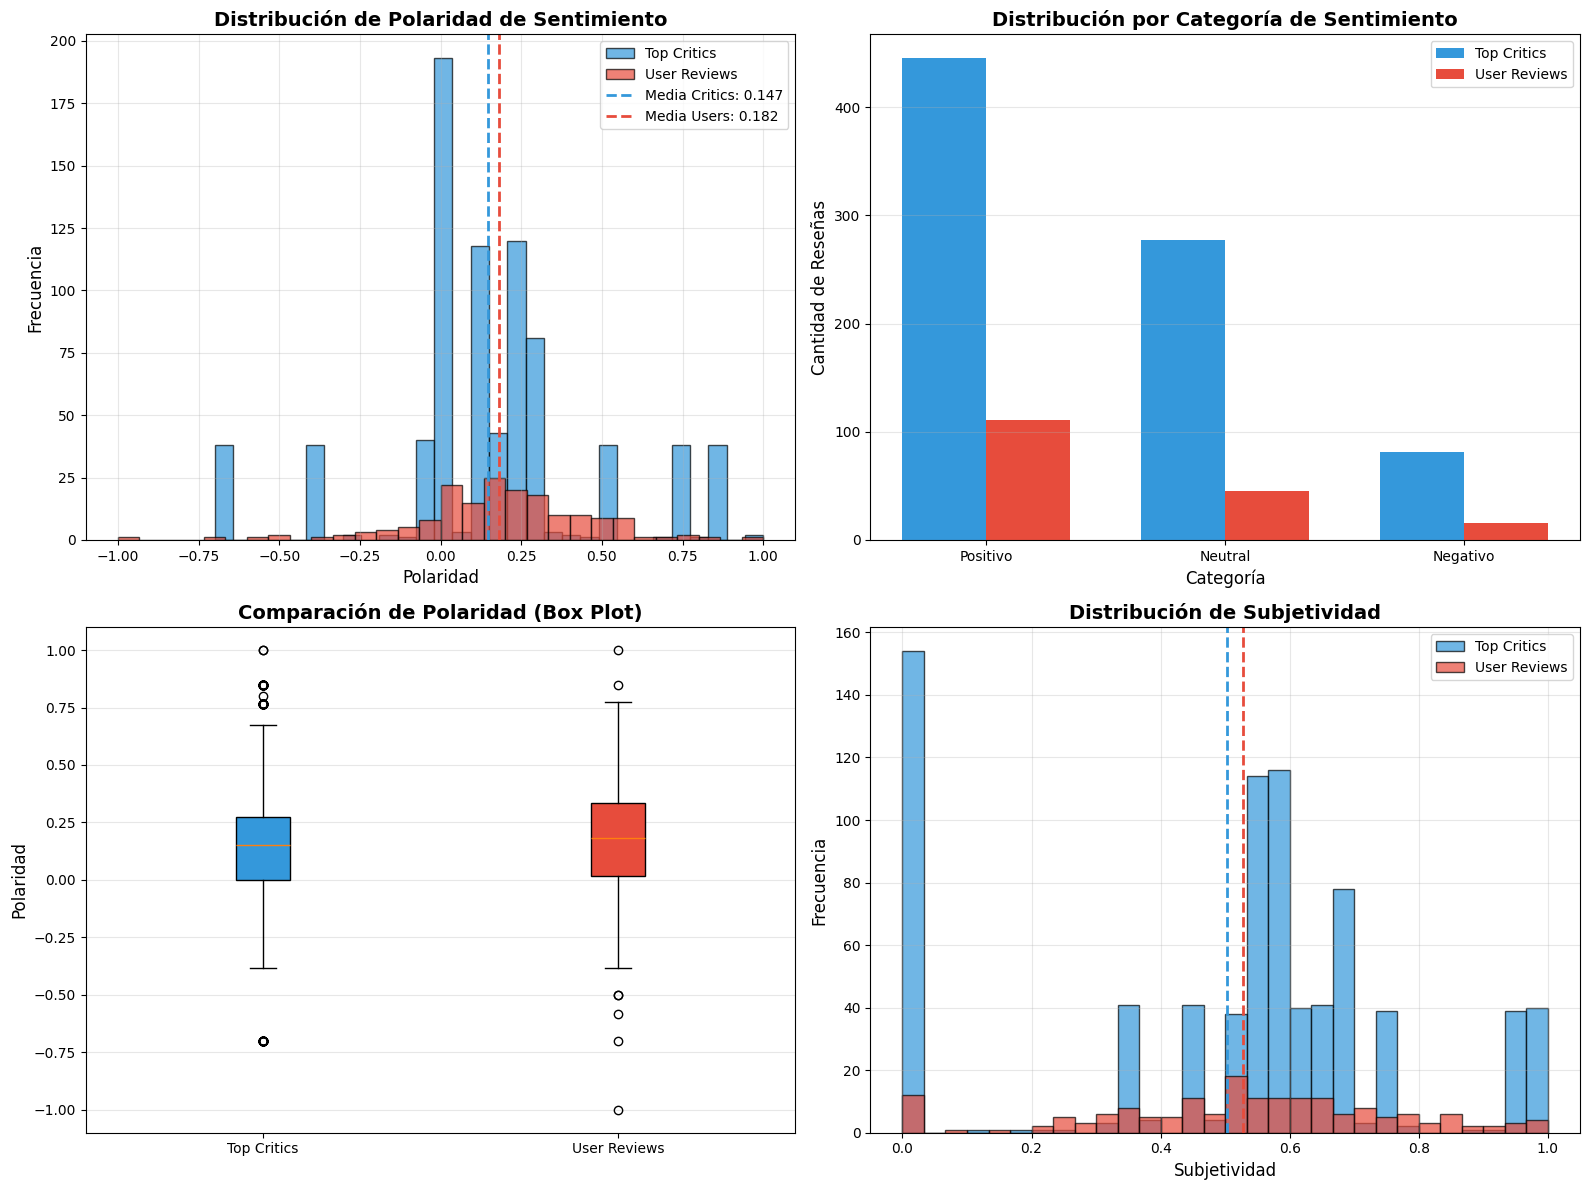

In [7]:
"""
Análisis de Sentimiento Comparativo: Top Critics vs User Reviews
Rotten Tomatoes - Frankenstein (2025)
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from collections import Counter

class SentimentAnalyzer:
    def __init__(self, critics_file, users_file):
        self.critics_file = critics_file
        self.users_file = users_file
        
    def load_data(self):
        """Carga los datos de ambos archivos"""
        print("📖 Cargando datos...")
        
        df_critics = pd.read_excel(self.critics_file)
        df_users = pd.read_excel(self.users_file)
        
        print(f"  ✓ Top Critics: {len(df_critics)} reseñas")
        print(f"  ✓ User Reviews: {len(df_users)} reseñas")
        print()
        
        return df_critics, df_users
    
    def clean_text(self, text):
        """Limpia el texto para análisis"""
        if pd.isna(text) or text == 'N/A':
            return ""
        
        text = str(text)
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def analyze_sentiment_textblob(self, text):
        """
        Analiza sentimiento con TextBlob
        Retorna: polaridad (-1 a 1) y subjetividad (0 a 1)
        """
        if not text:
            return 0, 0
        
        try:
            blob = TextBlob(text)
            return blob.sentiment.polarity, blob.sentiment.subjectivity
        except:
            return 0, 0
    
    def categorize_sentiment(self, polarity):
        """Categoriza la polaridad en Positivo/Neutral/Negativo"""
        if polarity > 0.1:
            return 'Positivo'
        elif polarity < -0.1:
            return 'Negativo'
        else:
            return 'Neutral'
    
    def analyze_group(self, df, group_name):
        """Analiza sentimiento de un grupo (Critics o Users)"""
        print(f"🔍 Analizando {group_name}...")
        
        sentiments = []
        
        for idx, row in df.iterrows():
            text = self.clean_text(row.get('Texto', ''))
            
            if text:
                polarity, subjectivity = self.analyze_sentiment_textblob(text)
                category = self.categorize_sentiment(polarity)
                
                sentiments.append({
                    'Texto': text[:100] + "..." if len(text) > 100 else text,
                    'Polaridad': polarity,
                    'Subjetividad': subjectivity,
                    'Categoría': category,
                    'Autor': row.get('Autor', 'N/A'),
                    'Fecha': row.get('Fecha', 'N/A')
                })
            
            if (idx + 1) % 100 == 0:
                print(f"  Procesadas {idx + 1}/{len(df)} reseñas...")
        
        df_sentiment = pd.DataFrame(sentiments)
        
        print(f"  ✓ Completado: {len(df_sentiment)} reseñas analizadas")
        print()
        
        return df_sentiment
    
    def compare_sentiments(self, df_critics_sent, df_users_sent):
        """Compara sentimientos entre grupos"""
        print("="*90)
        print("📊 COMPARACIÓN DE SENTIMIENTOS")
        print("="*90)
        print()
        
        # Estadísticas de polaridad
        print("📈 POLARIDAD (de -1 negativo a +1 positivo)")
        print("-" * 90)
        print(f"{'Métrica':<30} {'Top Critics':>20} {'User Reviews':>20}")
        print("-" * 90)
        
        critics_mean = df_critics_sent['Polaridad'].mean()
        users_mean = df_users_sent['Polaridad'].mean()
        
        critics_median = df_critics_sent['Polaridad'].median()
        users_median = df_users_sent['Polaridad'].median()
        
        critics_std = df_critics_sent['Polaridad'].std()
        users_std = df_users_sent['Polaridad'].std()
        
        print(f"{'Promedio':<30} {critics_mean:>20.3f} {users_mean:>20.3f}")
        print(f"{'Mediana':<30} {critics_median:>20.3f} {users_median:>20.3f}")
        print(f"{'Desviación Estándar':<30} {critics_std:>20.3f} {users_std:>20.3f}")
        print(f"{'Mínimo':<30} {df_critics_sent['Polaridad'].min():>20.3f} {df_users_sent['Polaridad'].min():>20.3f}")
        print(f"{'Máximo':<30} {df_critics_sent['Polaridad'].max():>20.3f} {df_users_sent['Polaridad'].max():>20.3f}")
        
        # Distribución por categoría
        print("\n" + "="*90)
        print("📊 DISTRIBUCIÓN POR CATEGORÍA")
        print("="*90)
        
        critics_dist = df_critics_sent['Categoría'].value_counts()
        users_dist = df_users_sent['Categoría'].value_counts()
        
        print(f"\n{'Categoría':<20} {'Top Critics':>20} {'%':>10} {'User Reviews':>20} {'%':>10}")
        print("-" * 90)
        
        for cat in ['Positivo', 'Neutral', 'Negativo']:
            c_count = critics_dist.get(cat, 0)
            u_count = users_dist.get(cat, 0)
            c_pct = (c_count / len(df_critics_sent)) * 100
            u_pct = (u_count / len(df_users_sent)) * 100
            
            print(f"{cat:<20} {c_count:>20} {c_pct:>9.1f}% {u_count:>20} {u_pct:>9.1f}%")
        
        # Subjetividad
        print("\n" + "="*90)
        print("📝 SUBJETIVIDAD (de 0 objetivo a 1 subjetivo)")
        print("="*90)
        
        critics_subj_mean = df_critics_sent['Subjetividad'].mean()
        users_subj_mean = df_users_sent['Subjetividad'].mean()
        
        print(f"\nPromedio Top Critics:   {critics_subj_mean:.3f}")
        print(f"Promedio User Reviews:  {users_subj_mean:.3f}")
        
        # Interpretación
        print("\n" + "="*90)
        print("💡 INTERPRETACIÓN")
        print("="*90)
        
        diff = users_mean - critics_mean
        
        if abs(diff) < 0.05:
            sentiment_comparison = "muy similar"
        elif diff > 0:
            sentiment_comparison = f"más positivo ({diff:.3f} puntos)"
        else:
            sentiment_comparison = f"más negativo ({abs(diff):.3f} puntos)"
        
        print(f"\n✓ El sentimiento de Users es {sentiment_comparison} que el de Critics")
        
        if critics_subj_mean > users_subj_mean:
            print(f"✓ Critics son más subjetivos ({critics_subj_mean - users_subj_mean:.3f} puntos)")
        else:
            print(f"✓ Users son más subjetivos ({users_subj_mean - critics_subj_mean:.3f} puntos)")
        
        print()
    
    def find_extreme_reviews(self, df_critics_sent, df_users_sent):
        """Encuentra las reseñas más positivas y negativas"""
        print("="*90)
        print("🔝 RESEÑAS MÁS EXTREMAS")
        print("="*90)
        
        # Top Critics - Más positiva
        print("\n📗 TOP CRITICS - Reseña más POSITIVA:")
        most_positive_critic = df_critics_sent.loc[df_critics_sent['Polaridad'].idxmax()]
        print(f"   Polaridad: {most_positive_critic['Polaridad']:.3f}")
        print(f"   Autor: {most_positive_critic['Autor']}")
        print(f"   Texto: \"{most_positive_critic['Texto']}\"")
        
        # Top Critics - Más negativa
        print("\n📕 TOP CRITICS - Reseña más NEGATIVA:")
        most_negative_critic = df_critics_sent.loc[df_critics_sent['Polaridad'].idxmin()]
        print(f"   Polaridad: {most_negative_critic['Polaridad']:.3f}")
        print(f"   Autor: {most_negative_critic['Autor']}")
        print(f"   Texto: \"{most_negative_critic['Texto']}\"")
        
        # Users - Más positiva
        print("\n📗 USERS - Reseña más POSITIVA:")
        most_positive_user = df_users_sent.loc[df_users_sent['Polaridad'].idxmax()]
        print(f"   Polaridad: {most_positive_user['Polaridad']:.3f}")
        print(f"   Autor: {most_positive_user['Autor']}")
        print(f"   Texto: \"{most_positive_user['Texto']}\"")
        
        # Users - Más negativa
        print("\n📕 USERS - Reseña más NEGATIVA:")
        most_negative_user = df_users_sent.loc[df_users_sent['Polaridad'].idxmin()]
        print(f"   Polaridad: {most_negative_user['Polaridad']:.3f}")
        print(f"   Autor: {most_negative_user['Autor']}")
        print(f"   Texto: \"{most_negative_user['Texto']}\"")
        print()
    
    def save_results(self, df_critics_sent, df_users_sent):
        """Guarda resultados en Excel"""
        output_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Analisis_Sentimiento_Comparativo.xlsx"
        
        # Añadir columna de grupo
        df_critics_sent['Grupo'] = 'Top Critics'
        df_users_sent['Grupo'] = 'User Reviews'
        
        # Combinar para comparativas
        df_combined = pd.concat([df_critics_sent, df_users_sent], ignore_index=True)
        
        # Estadísticas comparativas
        stats_data = {
            'Métrica': [
                'Promedio Polaridad', 'Mediana Polaridad', 'Desv. Est. Polaridad',
                'Promedio Subjetividad', '% Positivo', '% Neutral', '% Negativo',
                'Total Reseñas'
            ],
            'Top Critics': [
                df_critics_sent['Polaridad'].mean(),
                df_critics_sent['Polaridad'].median(),
                df_critics_sent['Polaridad'].std(),
                df_critics_sent['Subjetividad'].mean(),
                (df_critics_sent['Categoría'] == 'Positivo').sum() / len(df_critics_sent) * 100,
                (df_critics_sent['Categoría'] == 'Neutral').sum() / len(df_critics_sent) * 100,
                (df_critics_sent['Categoría'] == 'Negativo').sum() / len(df_critics_sent) * 100,
                len(df_critics_sent)
            ],
            'User Reviews': [
                df_users_sent['Polaridad'].mean(),
                df_users_sent['Polaridad'].median(),
                df_users_sent['Polaridad'].std(),
                df_users_sent['Subjetividad'].mean(),
                (df_users_sent['Categoría'] == 'Positivo').sum() / len(df_users_sent) * 100,
                (df_users_sent['Categoría'] == 'Neutral').sum() / len(df_users_sent) * 100,
                (df_users_sent['Categoría'] == 'Negativo').sum() / len(df_users_sent) * 100,
                len(df_users_sent)
            ]
        }
        
        df_stats = pd.DataFrame(stats_data)
        
        # Guardar en Excel
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            df_stats.to_excel(writer, sheet_name='Comparativa', index=False)
            df_critics_sent.to_excel(writer, sheet_name='Top Critics Detalle', index=False)
            df_users_sent.to_excel(writer, sheet_name='Users Detalle', index=False)
            df_combined.to_excel(writer, sheet_name='Todos Combinados', index=False)
        
        print("="*90)
        print("💾 RESULTADOS GUARDADOS")
        print("="*90)
        print(f"📁 {output_file}")
        print("\nHojas del Excel:")
        print("  1. Comparativa - Estadísticas lado a lado")
        print("  2. Top Critics Detalle - Análisis individual de cada reseña")
        print("  3. Users Detalle - Análisis individual de cada reseña")
        print("  4. Todos Combinados - Dataset completo para análisis adicional")
        print()
    
    def create_visualizations(self, df_critics_sent, df_users_sent):
        """Crea visualizaciones comparativas"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Distribución de Polaridad (Histogramas)
        axes[0, 0].hist(df_critics_sent['Polaridad'], bins=30, alpha=0.7, label='Top Critics', color='#3498db', edgecolor='black')
        axes[0, 0].hist(df_users_sent['Polaridad'], bins=30, alpha=0.7, label='User Reviews', color='#e74c3c', edgecolor='black')
        axes[0, 0].axvline(df_critics_sent['Polaridad'].mean(), color='#3498db', linestyle='--', linewidth=2, label=f'Media Critics: {df_critics_sent["Polaridad"].mean():.3f}')
        axes[0, 0].axvline(df_users_sent['Polaridad'].mean(), color='#e74c3c', linestyle='--', linewidth=2, label=f'Media Users: {df_users_sent["Polaridad"].mean():.3f}')
        axes[0, 0].set_xlabel('Polaridad', fontsize=12)
        axes[0, 0].set_ylabel('Frecuencia', fontsize=12)
        axes[0, 0].set_title('Distribución de Polaridad de Sentimiento', fontsize=14, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)
        
        # 2. Distribución por Categoría (Barras)
        critics_dist = df_critics_sent['Categoría'].value_counts()
        users_dist = df_users_sent['Categoría'].value_counts()
        
        categories = ['Positivo', 'Neutral', 'Negativo']
        critics_values = [critics_dist.get(cat, 0) for cat in categories]
        users_values = [users_dist.get(cat, 0) for cat in categories]
        
        x = range(len(categories))
        width = 0.35
        
        axes[0, 1].bar([i - width/2 for i in x], critics_values, width, label='Top Critics', color='#3498db')
        axes[0, 1].bar([i + width/2 for i in x], users_values, width, label='User Reviews', color='#e74c3c')
        axes[0, 1].set_xlabel('Categoría', fontsize=12)
        axes[0, 1].set_ylabel('Cantidad de Reseñas', fontsize=12)
        axes[0, 1].set_title('Distribución por Categoría de Sentimiento', fontsize=14, fontweight='bold')
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(categories)
        axes[0, 1].legend()
        axes[0, 1].grid(axis='y', alpha=0.3)
        
        # 3. Box Plot de Polaridad
        data_box = [df_critics_sent['Polaridad'], df_users_sent['Polaridad']]
        bp = axes[1, 0].boxplot(data_box, labels=['Top Critics', 'User Reviews'], patch_artist=True)
        bp['boxes'][0].set_facecolor('#3498db')
        bp['boxes'][1].set_facecolor('#e74c3c')
        axes[1, 0].set_ylabel('Polaridad', fontsize=12)
        axes[1, 0].set_title('Comparación de Polaridad (Box Plot)', fontsize=14, fontweight='bold')
        axes[1, 0].grid(axis='y', alpha=0.3)
        
        # 4. Subjetividad
        axes[1, 1].hist(df_critics_sent['Subjetividad'], bins=30, alpha=0.7, label='Top Critics', color='#3498db', edgecolor='black')
        axes[1, 1].hist(df_users_sent['Subjetividad'], bins=30, alpha=0.7, label='User Reviews', color='#e74c3c', edgecolor='black')
        axes[1, 1].axvline(df_critics_sent['Subjetividad'].mean(), color='#3498db', linestyle='--', linewidth=2)
        axes[1, 1].axvline(df_users_sent['Subjetividad'].mean(), color='#e74c3c', linestyle='--', linewidth=2)
        axes[1, 1].set_xlabel('Subjetividad', fontsize=12)
        axes[1, 1].set_ylabel('Frecuencia', fontsize=12)
        axes[1, 1].set_title('Distribución de Subjetividad', fontsize=14, fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
        
        plt.tight_layout()
        
        output_img = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_Sentimiento_Comparativo.png"
        plt.savefig(output_img, dpi=300, bbox_inches='tight')
        print(f"📊 {output_img}\n")
    
    def run_analysis(self):
        """Ejecuta el análisis completo"""
        print("\n" + "="*90)
        print("🎭 ANÁLISIS DE SENTIMIENTO COMPARATIVO")
        print("Top Critics vs User Reviews - Frankenstein (2025)")
        print("="*90)
        print()
        
        # Cargar datos
        df_critics, df_users = self.load_data()
        
        # Analizar cada grupo
        df_critics_sent = self.analyze_group(df_critics, "Top Critics")
        df_users_sent = self.analyze_group(df_users, "User Reviews")
        
        # Comparar
        self.compare_sentiments(df_critics_sent, df_users_sent)
        
        # Reseñas extremas
        self.find_extreme_reviews(df_critics_sent, df_users_sent)
        
        # Guardar resultados
        self.save_results(df_critics_sent, df_users_sent)
        
        # Crear visualizaciones
        self.create_visualizations(df_critics_sent, df_users_sent)
        
        print("="*90)
        print("✅ ANÁLISIS COMPLETADO")
        print("="*90)


def main():
    """Función principal"""
    
    # Primero instalar textblob si no está
    try:
        import textblob
    except ImportError:
        print("⚠️ Instalando textblob...")
        import subprocess
        subprocess.check_call(['pip', 'install', 'textblob'])
        print("✓ textblob instalado\n")
    
    critics_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Top_Critics_20260214_153950.xlsx"
    users_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/User_Reviews_20260214_143815.xlsx"
    
    analyzer = SentimentAnalyzer(critics_file, users_file)
    analyzer.run_analysis()


if __name__ == "__main__":
    main()


📚 ANÁLISIS POR CATEGORÍAS DEL DICCIONARIO + SENTIMIENTO

📖 Cargando diccionario de categorías...
  ✓ ACTING / PERFORMANCES: 29 palabras
  ✓ SCREENPLAY / STORY: 28 palabras
  ✓ CINEMATOGRAPHY & VISUALS: 33 palabras
  ✓ PRODUCTION DESIGN & COSTUMES: 31 palabras
  ✓ MUSIC & SOUND: 27 palabras

📊 Total: 5 categorías cargadas

📖 Cargando reseñas...
  ✓ Top Critics: 803 reseñas
  ✓ User Reviews: 173 reseñas

📊 Total: 976 reseñas

🔍 Analizando reseñas por categoría y sentimiento...
  Procesadas 100/976 reseñas...
  Procesadas 200/976 reseñas...
  Procesadas 300/976 reseñas...
  Procesadas 400/976 reseñas...
  Procesadas 500/976 reseñas...
  Procesadas 600/976 reseñas...
  Procesadas 700/976 reseñas...
  Procesadas 800/976 reseñas...
  Procesadas 900/976 reseñas...
  ✓ Completado: 975 reseñas analizadas

📊 ESTADÍSTICAS POR CATEGORÍA

📌 ACTING / PERFORMANCES
   Reseñas: 239 (24.5% del total)
   Polaridad: 0.017
   Subjetividad: 0.655
   Top Critics: 198 | User Reviews: 41

📌 SCREENPLAY / STORY

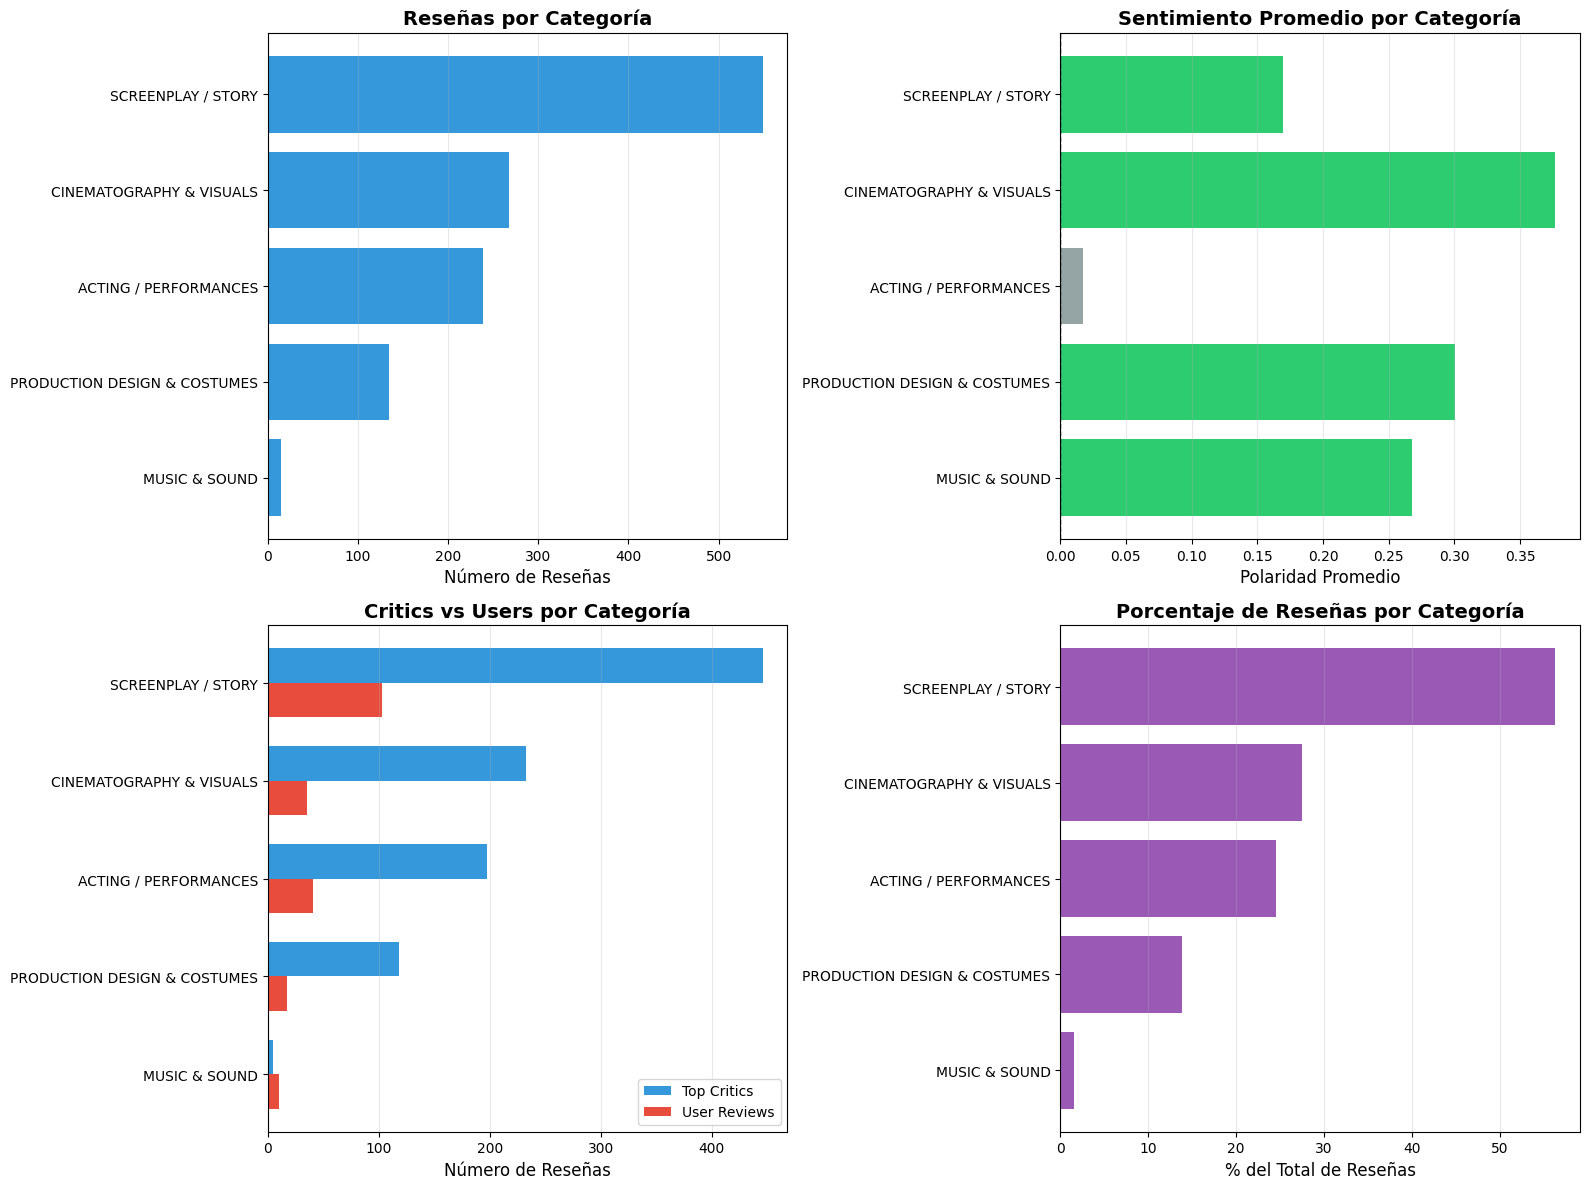

In [11]:
"""
Análisis de Categorías con Diccionario Personalizado + Sentimiento
Rotten Tomatoes - Frankenstein (2025)
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from collections import Counter

class CategorySentimentAnalyzer:
    def __init__(self, dictionary_file, reviews_files):
        self.dictionary_file = dictionary_file
        self.reviews_files = reviews_files
        self.categories = {}
        
    def load_dictionary(self):
        """Carga el diccionario de categorías desde Excel"""
        print("📖 Cargando diccionario de categorías...")
        
        try:
            # Intentar leer el Excel
            df_dict = pd.read_excel(self.dictionary_file, engine='openpyxl')
        except Exception as e:
            print(f"⚠️ Error al leer {self.dictionary_file}")
            print(f"   Error: {e}")
            print("\n💡 Soluciones:")
            print("   1. Verifica que el archivo esté cerrado (no abierto en Excel)")
            print("   2. Verifica los permisos del archivo")
            print("   3. Intenta guardar una copia del archivo con otro nombre")
            raise
        
        # Leer cada columna como una categoría
        for column in df_dict.columns:
            category_name = str(column)  # Asegurar que sea string
            words = df_dict[column].dropna().tolist()
            
            # Limpiar palabras - CONVERTIR TODO A STRING PRIMERO
            cleaned_words = []
            for word in words:
                # Convertir a string y limpiar
                word_str = str(word).lower().strip()
                
                # Ignorar valores como 'nan', números sueltos o strings vacíos
                if word_str not in ['nan', 'none', ''] and len(word_str) > 1:
                    cleaned_words.append(word_str)
            
            if cleaned_words:
                self.categories[category_name] = cleaned_words
                print(f"  ✓ {category_name}: {len(cleaned_words)} palabras")
        
        print(f"\n📊 Total: {len(self.categories)} categorías cargadas\n")
        return self.categories
    
    def load_reviews(self):
        """Carga todas las reseñas"""
        print("📖 Cargando reseñas...")
        
        all_reviews = []
        
        for file in self.reviews_files:
            df = pd.read_excel(file)
            
            # Añadir columna de origen
            if 'Top_Critics' in file:
                df['Origen'] = 'Top Critics'
            elif 'User_Reviews' in file:
                df['Origen'] = 'User Reviews'
            else:
                df['Origen'] = 'Unknown'
            
            all_reviews.append(df)
            print(f"  ✓ {df['Origen'].iloc[0]}: {len(df)} reseñas")
        
        df_all = pd.concat(all_reviews, ignore_index=True)
        print(f"\n📊 Total: {len(df_all)} reseñas\n")
        
        return df_all
    
    def clean_text(self, text):
        """Limpia texto"""
        if pd.isna(text) or text == 'N/A':
            return ""
        
        text = str(text).lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def classify_review(self, text):
        """Clasifica una reseña en categorías basándose en palabras del diccionario"""
        if not text:
            return []
        
        clean = self.clean_text(text)
        found_categories = []
        
        for category, words in self.categories.items():
            # Buscar cada palabra del diccionario en el texto
            for word in words:
                # Asegurar que word es un string
                word_str = str(word).strip()
                if not word_str or len(word_str) < 2:
                    continue
                
                # Buscar como palabra completa
                pattern = r'\b' + re.escape(word_str) + r'\b'
                if re.search(pattern, clean):
                    found_categories.append(category)
                    break  # Una vez encontrada la categoría, pasar a la siguiente
        
        return found_categories
    
    def analyze_sentiment(self, text):
        """Analiza sentimiento del texto"""
        if not text:
            return 0, 0
        
        try:
            blob = TextBlob(text)
            return blob.sentiment.polarity, blob.sentiment.subjectivity
        except:
            return 0, 0
    
    def analyze_all_reviews(self, df_reviews):
        """Analiza todas las reseñas: categorías + sentimiento"""
        print("🔍 Analizando reseñas por categoría y sentimiento...")
        
        results = []
        
        for idx, row in df_reviews.iterrows():
            text_raw = row.get('Texto', '')
            
            # CONVERTIR A STRING PRIMERO
            if pd.isna(text_raw) or text_raw == 'N/A':
                text = ''
            else:
                text = str(text_raw)  # Forzar conversión a string
            
            if text and len(text) > 0:
                # Clasificar en categorías
                categories = self.classify_review(text)
                
                # Analizar sentimiento
                polarity, subjectivity = self.analyze_sentiment(text)
                
                # Guardar resultado
                result = {
                    'Texto': text[:150] + "..." if len(text) > 150 else text,
                    'Autor': row.get('Autor', 'N/A'),
                    'Origen': row.get('Origen', 'Unknown'),
                    'Categorías': ', '.join(categories) if categories else 'Sin Categoría',
                    'Num_Categorías': len(categories),
                    'Polaridad': polarity,
                    'Subjetividad': subjectivity
                }
                
                # Añadir una columna booleana por cada categoría
                for category in self.categories.keys():
                    result[f'Cat_{category}'] = 1 if category in categories else 0
                
                results.append(result)
            
            if (idx + 1) % 100 == 0:
                print(f"  Procesadas {idx + 1}/{len(df_reviews)} reseñas...")
        
        df_results = pd.DataFrame(results)
        
        print(f"  ✓ Completado: {len(df_results)} reseñas analizadas\n")
        
        return df_results
    
    def generate_statistics(self, df_results):
        """Genera estadísticas por categoría"""
        print("="*100)
        print("📊 ESTADÍSTICAS POR CATEGORÍA")
        print("="*100)
        print()
        
        stats = []
        
        for category in self.categories.keys():
            col_name = f'Cat_{category}'
            
            # Filtrar reseñas de esta categoría
            df_cat = df_results[df_results[col_name] == 1]
            
            if len(df_cat) > 0:
                num_reviews = len(df_cat)
                pct_total = (num_reviews / len(df_results)) * 100
                
                avg_polarity = df_cat['Polaridad'].mean()
                avg_subjectivity = df_cat['Subjetividad'].mean()
                
                # Contar por origen
                critics_count = (df_cat['Origen'] == 'Top Critics').sum()
                users_count = (df_cat['Origen'] == 'User Reviews').sum()
                
                stats.append({
                    'Categoría': category,
                    'Num_Reseñas': num_reviews,
                    '% del Total': pct_total,
                    'Polaridad Promedio': avg_polarity,
                    'Subjetividad Promedio': avg_subjectivity,
                    'Top Critics': critics_count,
                    'User Reviews': users_count
                })
                
                print(f"📌 {category}")
                print(f"   Reseñas: {num_reviews} ({pct_total:.1f}% del total)")
                print(f"   Polaridad: {avg_polarity:.3f}")
                print(f"   Subjetividad: {avg_subjectivity:.3f}")
                print(f"   Top Critics: {critics_count} | User Reviews: {users_count}")
                print()
        
        df_stats = pd.DataFrame(stats)
        df_stats = df_stats.sort_values('Num_Reseñas', ascending=False)
        
        # Reseñas sin categoría
        no_category = (df_results['Num_Categorías'] == 0).sum()
        pct_no_cat = (no_category / len(df_results)) * 100
        
        print(f"⚠️ Sin Categoría: {no_category} reseñas ({pct_no_cat:.1f}%)")
        print()
        
        return df_stats
    
    def find_best_worst_by_category(self, df_results):
        """Encuentra las mejores y peores reseñas por categoría"""
        print("="*100)
        print("🏆 RESEÑAS MÁS POSITIVAS Y NEGATIVAS POR CATEGORÍA")
        print("="*100)
        print()
        
        for category in self.categories.keys():
            col_name = f'Cat_{category}'
            df_cat = df_results[df_results[col_name] == 1]
            
            if len(df_cat) > 0:
                print(f"\n📌 {category.upper()}")
                print("-" * 100)
                
                # Más positiva
                most_positive = df_cat.loc[df_cat['Polaridad'].idxmax()]
                print(f"\n  ✅ Más POSITIVA (Polaridad: {most_positive['Polaridad']:.3f})")
                print(f"     Autor: {most_positive['Autor']} ({most_positive['Origen']})")
                print(f"     Texto: \"{most_positive['Texto']}\"")
                
                # Más negativa
                most_negative = df_cat.loc[df_cat['Polaridad'].idxmin()]
                print(f"\n  ❌ Más NEGATIVA (Polaridad: {most_negative['Polaridad']:.3f})")
                print(f"     Autor: {most_negative['Autor']} ({most_negative['Origen']})")
                print(f"     Texto: \"{most_negative['Texto']}\"")
                print()
    
    def save_results(self, df_results, df_stats):
        """Guarda resultados en Excel"""
        output_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Analisis_Categorias_Sentimiento.xlsx"
        
        # Crear hoja de palabras por categoría
        dict_data = []
        for category, words in self.categories.items():
            for word in words:
                dict_data.append({'Categoría': category, 'Palabra': word})
        df_dictionary = pd.DataFrame(dict_data)
        
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            df_stats.to_excel(writer, sheet_name='Resumen por Categoría', index=False)
            df_results.to_excel(writer, sheet_name='Reseñas Clasificadas', index=False)
            df_dictionary.to_excel(writer, sheet_name='Diccionario Usado', index=False)
        
        print("="*100)
        print("💾 RESULTADOS GUARDADOS")
        print("="*100)
        print(f"📁 {output_file}")
        print("\nHojas del Excel:")
        print("  1. Resumen por Categoría - Estadísticas y sentimiento por categoría")
        print("  2. Reseñas Clasificadas - Cada reseña con sus categorías y sentimiento")
        print("  3. Diccionario Usado - Palabras por categoría del diccionario")
        print()
    
    def create_visualizations(self, df_results, df_stats):
        """Crea visualizaciones"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Número de reseñas por categoría
        categories = df_stats['Categoría'].tolist()
        counts = df_stats['Num_Reseñas'].tolist()
        
        axes[0, 0].barh(categories, counts, color='#3498db')
        axes[0, 0].set_xlabel('Número de Reseñas', fontsize=12)
        axes[0, 0].set_title('Reseñas por Categoría', fontsize=14, fontweight='bold')
        axes[0, 0].invert_yaxis()
        axes[0, 0].grid(axis='x', alpha=0.3)
        
        # 2. Polaridad promedio por categoría
        polarities = df_stats['Polaridad Promedio'].tolist()
        colors = ['#2ecc71' if p > 0.1 else '#e74c3c' if p < -0.1 else '#95a5a6' for p in polarities]
        
        axes[0, 1].barh(categories, polarities, color=colors)
        axes[0, 1].set_xlabel('Polaridad Promedio', fontsize=12)
        axes[0, 1].set_title('Sentimiento Promedio por Categoría', fontsize=14, fontweight='bold')
        axes[0, 1].axvline(0, color='black', linestyle='--', linewidth=1)
        axes[0, 1].invert_yaxis()
        axes[0, 1].grid(axis='x', alpha=0.3)
        
        # 3. Distribución Critics vs Users por categoría
        critics_counts = df_stats['Top Critics'].tolist()
        users_counts = df_stats['User Reviews'].tolist()
        
        x = range(len(categories))
        width = 0.35
        
        axes[1, 0].barh([i - width/2 for i in x], critics_counts, width, label='Top Critics', color='#3498db')
        axes[1, 0].barh([i + width/2 for i in x], users_counts, width, label='User Reviews', color='#e74c3c')
        axes[1, 0].set_yticks(x)
        axes[1, 0].set_yticklabels(categories)
        axes[1, 0].set_xlabel('Número de Reseñas', fontsize=12)
        axes[1, 0].set_title('Critics vs Users por Categoría', fontsize=14, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].invert_yaxis()
        axes[1, 0].grid(axis='x', alpha=0.3)
        
        # 4. Porcentaje del total
        percentages = df_stats['% del Total'].tolist()
        
        axes[1, 1].barh(categories, percentages, color='#9b59b6')
        axes[1, 1].set_xlabel('% del Total de Reseñas', fontsize=12)
        axes[1, 1].set_title('Porcentaje de Reseñas por Categoría', fontsize=14, fontweight='bold')
        axes[1, 1].invert_yaxis()
        axes[1, 1].grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        
        output_img = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_Categorias_Sentimiento.png"
        plt.savefig(output_img, dpi=300, bbox_inches='tight')
        print(f"📊 {output_img}\n")
    
    def run_analysis(self):
        """Ejecuta el análisis completo"""
        print("\n" + "="*100)
        print("📚 ANÁLISIS POR CATEGORÍAS DEL DICCIONARIO + SENTIMIENTO")
        print("="*100)
        print()
        
        # Cargar diccionario
        self.load_dictionary()
        
        # Cargar reseñas
        df_reviews = self.load_reviews()
        
        # Analizar
        df_results = self.analyze_all_reviews(df_reviews)
        
        # Estadísticas
        df_stats = self.generate_statistics(df_results)
        
        # Mejores y peores por categoría
        self.find_best_worst_by_category(df_results)
        
        # Guardar
        self.save_results(df_results, df_stats)
        
        # Visualizar
        self.create_visualizations(df_results, df_stats)
        
        print("="*100)
        print("✅ ANÁLISIS COMPLETADO")
        print("="*100)


def main():
    """Función principal"""
    
    # Archivos
    dictionary_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Análisis/Dictionary.xlsx"
    
    reviews_files = [
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Top_Critics_20260214_153950.xlsx",
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/User_Reviews_20260214_143815.xlsx"
    ]
    
    analyzer = CategorySentimentAnalyzer(dictionary_file, reviews_files)
    analyzer.run_analysis()


if __name__ == "__main__":
    main()


📚 ANÁLISIS POR CATEGORÍAS DEL DICCIONARIO + SENTIMIENTO

📖 Cargando diccionario de categorías...
  ✓ ACTING / PERFORMANCES: 29 palabras
  ✓ SCREENPLAY / STORY: 28 palabras
  ✓ CINEMATOGRAPHY & VISUALS: 33 palabras
  ✓ PRODUCTION DESIGN & COSTUMES: 31 palabras
  ✓ MUSIC & SOUND: 27 palabras

📊 Total: 5 categorías cargadas

📖 Cargando reseñas...
  ✓ Top Critics: 803 reseñas
  ✓ User Reviews: 173 reseñas

📊 Total: 976 reseñas

🔍 Analizando reseñas por categoría y sentimiento...
  Procesadas 100/976 reseñas...
  Procesadas 200/976 reseñas...
  Procesadas 300/976 reseñas...
  Procesadas 400/976 reseñas...
  Procesadas 500/976 reseñas...
  Procesadas 600/976 reseñas...
  Procesadas 700/976 reseñas...
  Procesadas 800/976 reseñas...
  Procesadas 900/976 reseñas...
  ✓ Completado: 975 reseñas analizadas

📊 ESTADÍSTICAS POR CATEGORÍA

📌 ACTING / PERFORMANCES
   Reseñas: 239 (24.5% del total)
   Polaridad: 0.017
   Subjetividad: 0.655
   Top Critics: 198 | User Reviews: 41

📌 SCREENPLAY / STORY

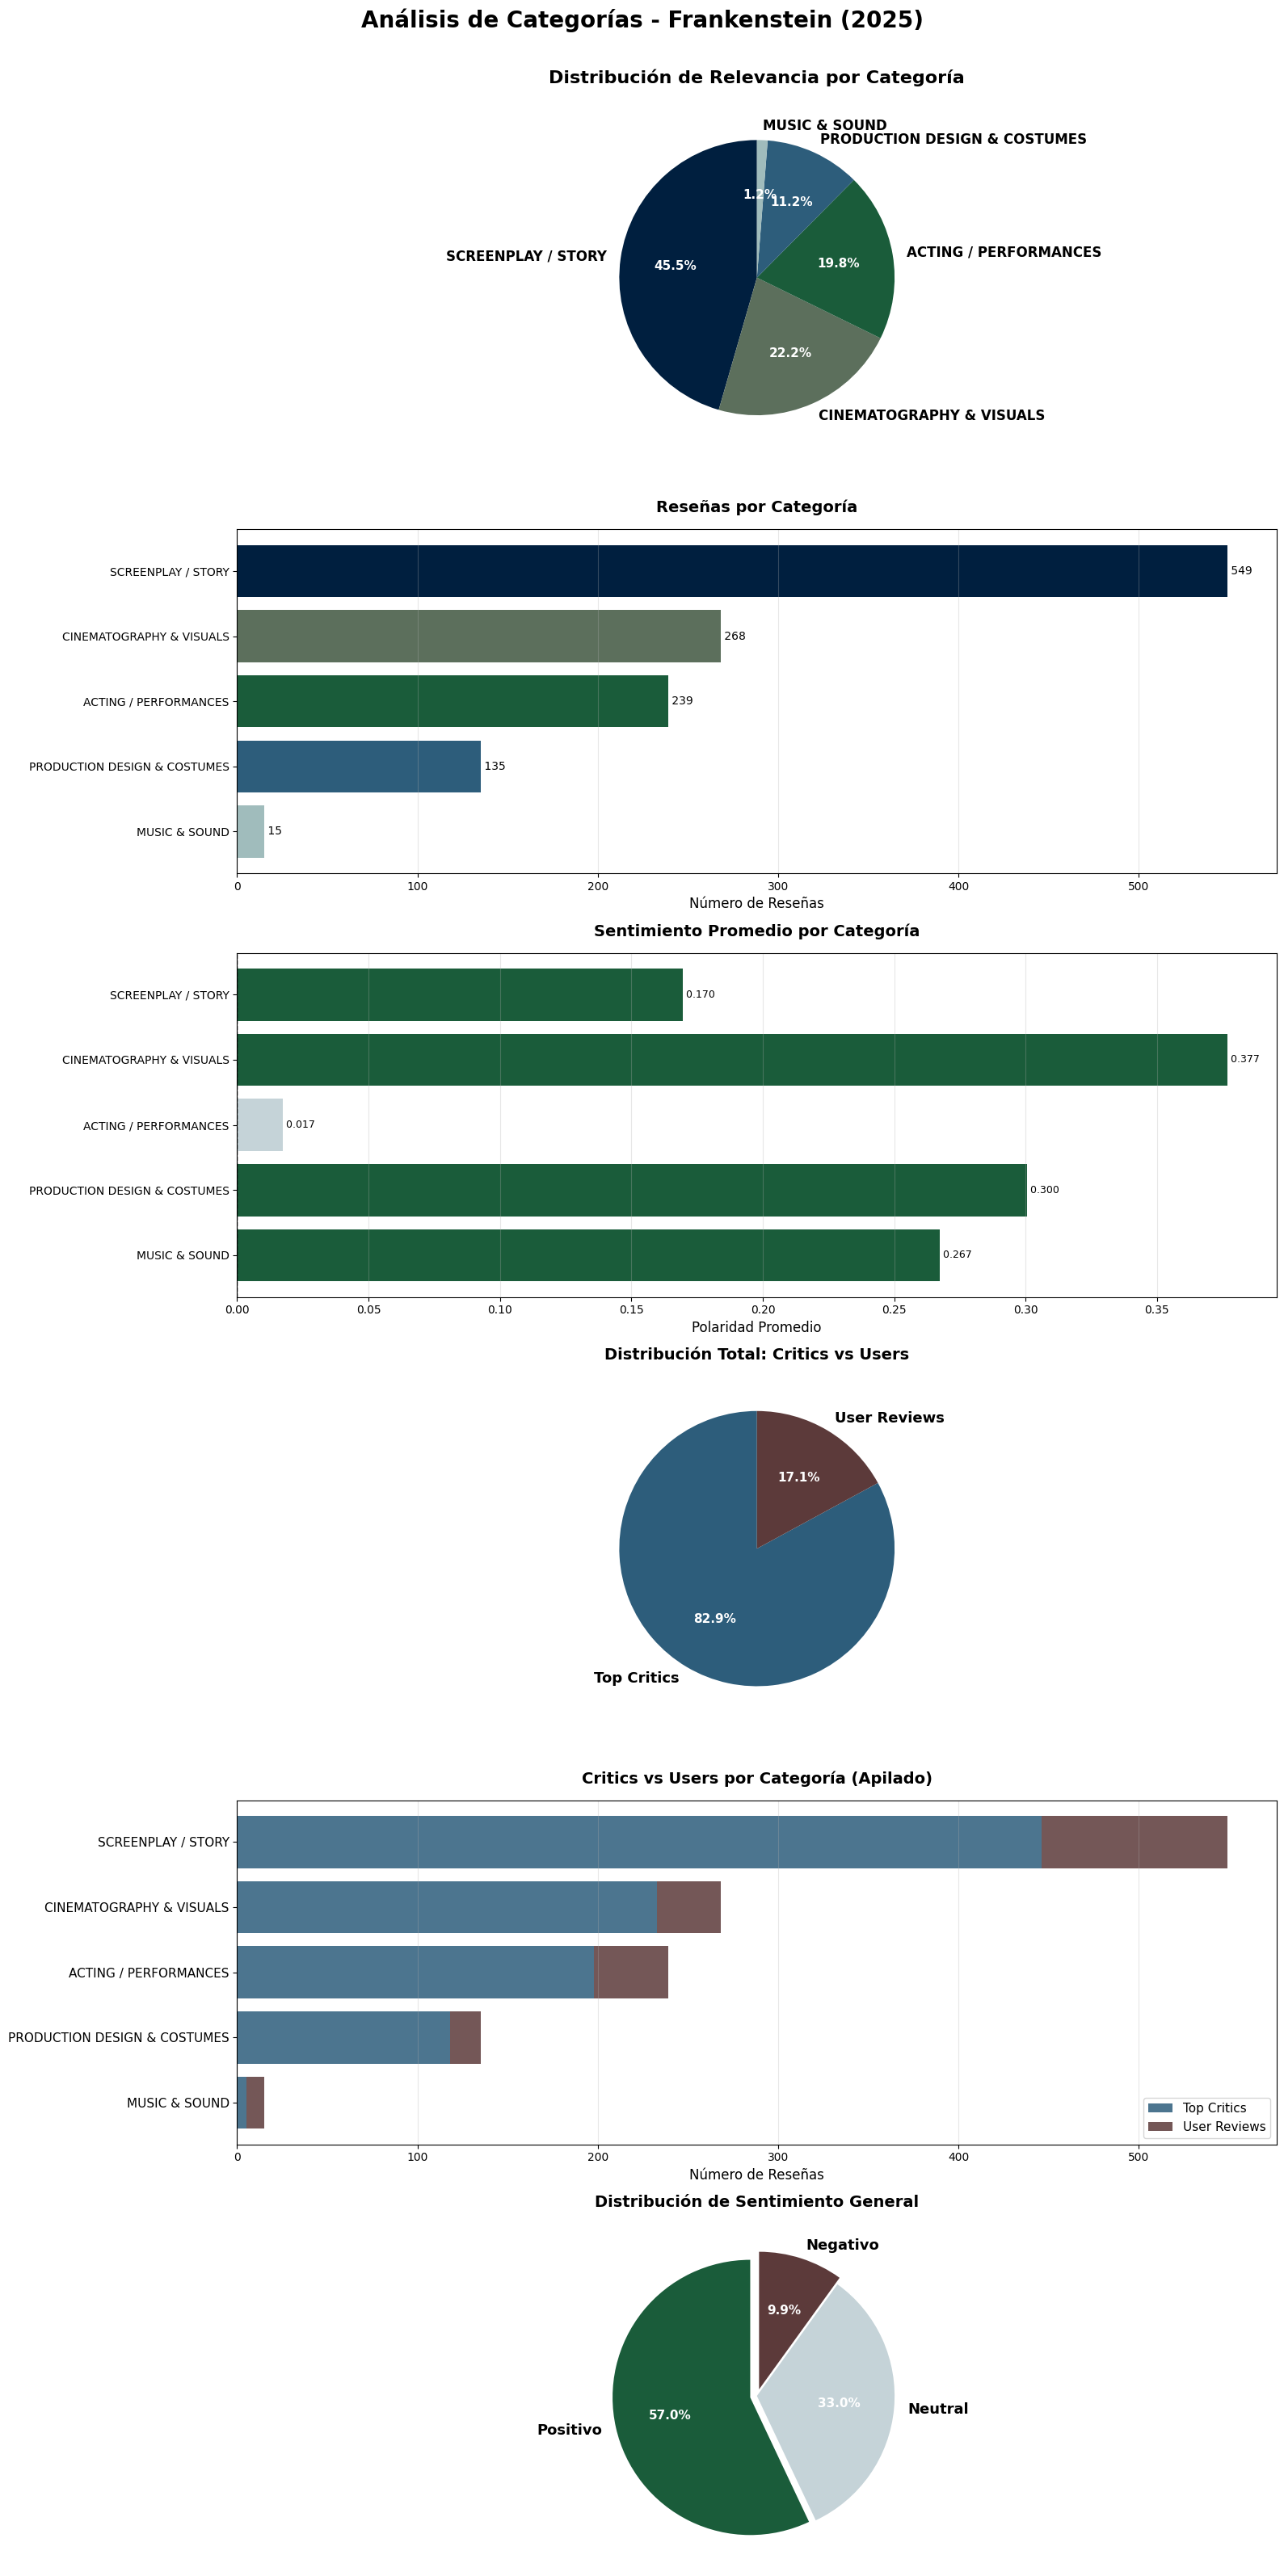

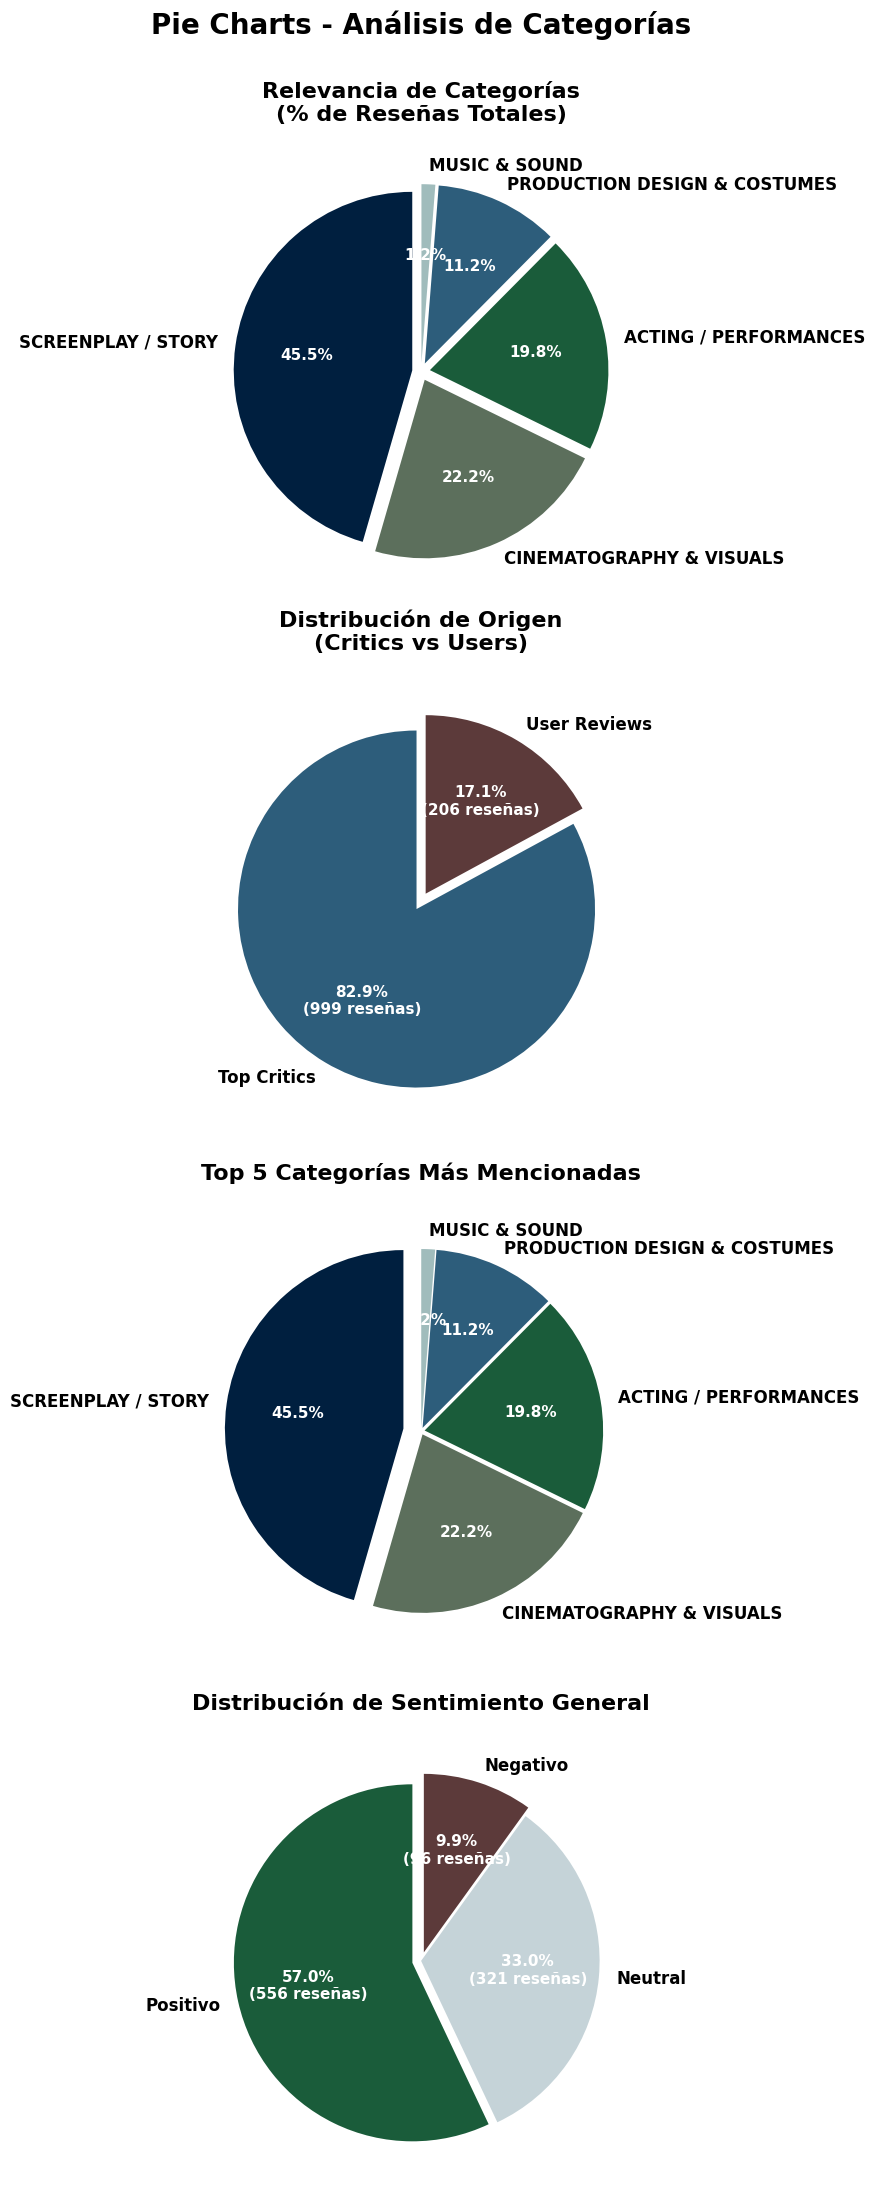

In [14]:
"""
Análisis de Categorías con Diccionario Personalizado + Sentimiento
Rotten Tomatoes - Frankenstein (2025)
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from collections import Counter

class CategorySentimentAnalyzer:
    def __init__(self, dictionary_file, reviews_files):
        self.dictionary_file = dictionary_file
        self.reviews_files = reviews_files
        self.categories = {}
        
    def load_dictionary(self):
        """Carga el diccionario de categorías desde Excel"""
        print("📖 Cargando diccionario de categorías...")
        
        try:
            # Intentar leer el Excel
            df_dict = pd.read_excel(self.dictionary_file, engine='openpyxl')
        except Exception as e:
            print(f"⚠️ Error al leer {self.dictionary_file}")
            print(f"   Error: {e}")
            print("\n💡 Soluciones:")
            print("   1. Verifica que el archivo esté cerrado (no abierto en Excel)")
            print("   2. Verifica los permisos del archivo")
            print("   3. Intenta guardar una copia del archivo con otro nombre")
            raise
        
        # Leer cada columna como una categoría
        for column in df_dict.columns:
            category_name = str(column)  # Asegurar que sea string
            words = df_dict[column].dropna().tolist()
            
            # Limpiar palabras - CONVERTIR TODO A STRING PRIMERO
            cleaned_words = []
            for word in words:
                # Convertir a string y limpiar
                word_str = str(word).lower().strip()
                
                # Ignorar valores como 'nan', números sueltos o strings vacíos
                if word_str not in ['nan', 'none', ''] and len(word_str) > 1:
                    cleaned_words.append(word_str)
            
            if cleaned_words:
                self.categories[category_name] = cleaned_words
                print(f"  ✓ {category_name}: {len(cleaned_words)} palabras")
        
        print(f"\n📊 Total: {len(self.categories)} categorías cargadas\n")
        return self.categories
    
    def load_reviews(self):
        """Carga todas las reseñas"""
        print("📖 Cargando reseñas...")
        
        all_reviews = []
        
        for file in self.reviews_files:
            df = pd.read_excel(file)
            
            # Añadir columna de origen
            if 'Top_Critics' in file:
                df['Origen'] = 'Top Critics'
            elif 'User_Reviews' in file:
                df['Origen'] = 'User Reviews'
            else:
                df['Origen'] = 'Unknown'
            
            all_reviews.append(df)
            print(f"  ✓ {df['Origen'].iloc[0]}: {len(df)} reseñas")
        
        df_all = pd.concat(all_reviews, ignore_index=True)
        print(f"\n📊 Total: {len(df_all)} reseñas\n")
        
        return df_all
    
    def clean_text(self, text):
        """Limpia texto"""
        if pd.isna(text) or text == 'N/A':
            return ""
        
        text = str(text).lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def classify_review(self, text):
        """Clasifica una reseña en categorías basándose en palabras del diccionario"""
        if not text:
            return []
        
        clean = self.clean_text(text)
        found_categories = []
        
        for category, words in self.categories.items():
            # Buscar cada palabra del diccionario en el texto
            for word in words:
                # Asegurar que word es un string
                word_str = str(word).strip()
                if not word_str or len(word_str) < 2:
                    continue
                
                # Buscar como palabra completa
                pattern = r'\b' + re.escape(word_str) + r'\b'
                if re.search(pattern, clean):
                    found_categories.append(category)
                    break  # Una vez encontrada la categoría, pasar a la siguiente
        
        return found_categories
    
    def analyze_sentiment(self, text):
        """Analiza sentimiento del texto"""
        if not text:
            return 0, 0
        
        try:
            blob = TextBlob(text)
            return blob.sentiment.polarity, blob.sentiment.subjectivity
        except:
            return 0, 0
    
    def analyze_all_reviews(self, df_reviews):
        """Analiza todas las reseñas: categorías + sentimiento"""
        print("🔍 Analizando reseñas por categoría y sentimiento...")
        
        results = []
        
        for idx, row in df_reviews.iterrows():
            text_raw = row.get('Texto', '')
            
            # CONVERTIR A STRING PRIMERO
            if pd.isna(text_raw) or text_raw == 'N/A':
                text = ''
            else:
                text = str(text_raw)  # Forzar conversión a string
            
            if text and len(text) > 0:
                # Clasificar en categorías
                categories = self.classify_review(text)
                
                # Analizar sentimiento
                polarity, subjectivity = self.analyze_sentiment(text)
                
                # Guardar resultado
                result = {
                    'Texto': text[:150] + "..." if len(text) > 150 else text,
                    'Autor': row.get('Autor', 'N/A'),
                    'Origen': row.get('Origen', 'Unknown'),
                    'Categorías': ', '.join(categories) if categories else 'Sin Categoría',
                    'Num_Categorías': len(categories),
                    'Polaridad': polarity,
                    'Subjetividad': subjectivity
                }
                
                # Añadir una columna booleana por cada categoría
                for category in self.categories.keys():
                    result[f'Cat_{category}'] = 1 if category in categories else 0
                
                results.append(result)
            
            if (idx + 1) % 100 == 0:
                print(f"  Procesadas {idx + 1}/{len(df_reviews)} reseñas...")
        
        df_results = pd.DataFrame(results)
        
        print(f"  ✓ Completado: {len(df_results)} reseñas analizadas\n")
        
        return df_results
    
    def generate_statistics(self, df_results):
        """Genera estadísticas por categoría"""
        print("="*100)
        print("📊 ESTADÍSTICAS POR CATEGORÍA")
        print("="*100)
        print()
        
        stats = []
        
        for category in self.categories.keys():
            col_name = f'Cat_{category}'
            
            # Filtrar reseñas de esta categoría
            df_cat = df_results[df_results[col_name] == 1]
            
            if len(df_cat) > 0:
                num_reviews = len(df_cat)
                pct_total = (num_reviews / len(df_results)) * 100
                
                avg_polarity = df_cat['Polaridad'].mean()
                avg_subjectivity = df_cat['Subjetividad'].mean()
                
                # Contar por origen
                critics_count = (df_cat['Origen'] == 'Top Critics').sum()
                users_count = (df_cat['Origen'] == 'User Reviews').sum()
                
                stats.append({
                    'Categoría': category,
                    'Num_Reseñas': num_reviews,
                    '% del Total': pct_total,
                    'Polaridad Promedio': avg_polarity,
                    'Subjetividad Promedio': avg_subjectivity,
                    'Top Critics': critics_count,
                    'User Reviews': users_count
                })
                
                print(f"📌 {category}")
                print(f"   Reseñas: {num_reviews} ({pct_total:.1f}% del total)")
                print(f"   Polaridad: {avg_polarity:.3f}")
                print(f"   Subjetividad: {avg_subjectivity:.3f}")
                print(f"   Top Critics: {critics_count} | User Reviews: {users_count}")
                print()
        
        df_stats = pd.DataFrame(stats)
        df_stats = df_stats.sort_values('Num_Reseñas', ascending=False)
        
        # Reseñas sin categoría
        no_category = (df_results['Num_Categorías'] == 0).sum()
        pct_no_cat = (no_category / len(df_results)) * 100
        
        print(f"⚠️ Sin Categoría: {no_category} reseñas ({pct_no_cat:.1f}%)")
        print()
        
        return df_stats
    
    def find_best_worst_by_category(self, df_results):
        """Encuentra las mejores y peores reseñas por categoría"""
        print("="*100)
        print("🏆 RESEÑAS MÁS POSITIVAS Y NEGATIVAS POR CATEGORÍA")
        print("="*100)
        print()
        
        for category in self.categories.keys():
            col_name = f'Cat_{category}'
            df_cat = df_results[df_results[col_name] == 1]
            
            if len(df_cat) > 0:
                print(f"\n📌 {category.upper()}")
                print("-" * 100)
                
                # Más positiva
                most_positive = df_cat.loc[df_cat['Polaridad'].idxmax()]
                print(f"\n  ✅ Más POSITIVA (Polaridad: {most_positive['Polaridad']:.3f})")
                print(f"     Autor: {most_positive['Autor']} ({most_positive['Origen']})")
                print(f"     Texto: \"{most_positive['Texto']}\"")
                
                # Más negativa
                most_negative = df_cat.loc[df_cat['Polaridad'].idxmin()]
                print(f"\n  ❌ Más NEGATIVA (Polaridad: {most_negative['Polaridad']:.3f})")
                print(f"     Autor: {most_negative['Autor']} ({most_negative['Origen']})")
                print(f"     Texto: \"{most_negative['Texto']}\"")
                print()
    
    def save_results(self, df_results, df_stats):
        """Guarda resultados en Excel"""
        output_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Analisis_Categorias_Sentimiento.xlsx"
        
        # Crear hoja de palabras por categoría
        dict_data = []
        for category, words in self.categories.items():
            for word in words:
                dict_data.append({'Categoría': category, 'Palabra': word})
        df_dictionary = pd.DataFrame(dict_data)
        
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            df_stats.to_excel(writer, sheet_name='Resumen por Categoría', index=False)
            df_results.to_excel(writer, sheet_name='Reseñas Clasificadas', index=False)
            df_dictionary.to_excel(writer, sheet_name='Diccionario Usado', index=False)
        
        print("="*100)
        print("💾 RESULTADOS GUARDADOS")
        print("="*100)
        print(f"📁 {output_file}")
        print("\nHojas del Excel:")
        print("  1. Resumen por Categoría - Estadísticas y sentimiento por categoría")
        print("  2. Reseñas Clasificadas - Cada reseña con sus categorías y sentimiento")
        print("  3. Diccionario Usado - Palabras por categoría del diccionario")
        print()
    
    def create_visualizations(self, df_results, df_stats):
        """Crea visualizaciones incluyendo pie charts con paleta personalizada - Layout vertical"""
        
        # PALETA DE COLORES PERSONALIZADA
        custom_palette = [
            '#001F3F',  # Azul oscuro
            '#5C6F5C',  # Verde grisáceo
            '#1A5C3A',  # Verde oscuro
            '#2D5D7B',  # Azul medio
            '#A0BCBC',  # Azul claro
            '#D4C5B0',  # Beige
            '#F5F5DC',  # Crema
            '#B8A76B',  # Dorado/mostaza
            '#5C3A3A',  # Marrón
            '#C5D3D8',  # Gris azulado claro
            '#E8E8E8'   # Gris muy claro
        ]
        
        # Figura vertical con todos los gráficos uno debajo del otro
        fig, axes = plt.subplots(6, 1, figsize=(16, 32))
        
        categories = df_stats['Categoría'].tolist()
        counts = df_stats['Num_Reseñas'].tolist()
        polarities = df_stats['Polaridad Promedio'].tolist()
        percentages = df_stats['% del Total'].tolist()
        
        # Asignar colores de la paleta
        colors_pie = [custom_palette[i % len(custom_palette)] for i in range(len(categories))]
        
        # 1. PIE CHART - Relevancia por Categoría
        wedges, texts, autotexts = axes[0].pie(
            counts, 
            labels=categories, 
            autopct='%1.1f%%',
            colors=colors_pie,
            startangle=90,
            textprops={'fontsize': 12, 'weight': 'bold'}
        )
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontsize(11)
            autotext.set_weight('bold')
        
        axes[0].set_title('Distribución de Relevancia por Categoría', 
                         fontsize=16, fontweight='bold', pad=20)
        
        # 2. Barras - Número de reseñas por categoría
        axes[1].barh(categories, counts, color=colors_pie)
        axes[1].set_xlabel('Número de Reseñas', fontsize=12)
        axes[1].set_title('Reseñas por Categoría', fontsize=14, fontweight='bold', pad=15)
        axes[1].invert_yaxis()
        axes[1].grid(axis='x', alpha=0.3)
        
        for i, v in enumerate(counts):
            axes[1].text(v, i, f' {v}', va='center', fontsize=10)
        
        # 3. Barras - Polaridad promedio por categoría
        colors_sent = [custom_palette[2] if p > 0.1 else custom_palette[8] if p < -0.1 else custom_palette[9] for p in polarities]
        axes[2].barh(categories, polarities, color=colors_sent)
        axes[2].set_xlabel('Polaridad Promedio', fontsize=12)
        axes[2].set_title('Sentimiento Promedio por Categoría', fontsize=14, fontweight='bold', pad=15)
        axes[2].axvline(0, color='black', linestyle='--', linewidth=1)
        axes[2].invert_yaxis()
        axes[2].grid(axis='x', alpha=0.3)
        
        for i, v in enumerate(polarities):
            axes[2].text(v, i, f' {v:.3f}', va='center', fontsize=9)
        
        # 4. PIE CHART - Critics vs Users
        total_critics = df_stats['Top Critics'].sum()
        total_users = df_stats['User Reviews'].sum()
        
        wedges2, texts2, autotexts2 = axes[3].pie(
            [total_critics, total_users],
            labels=['Top Critics', 'User Reviews'],
            autopct='%1.1f%%',
            colors=[custom_palette[3], custom_palette[8]],
            startangle=90,
            textprops={'fontsize': 13, 'weight': 'bold'}
        )
        for autotext in autotexts2:
            autotext.set_color('white')
            autotext.set_fontsize(11)
            autotext.set_weight('bold')
        
        axes[3].set_title('Distribución Total: Critics vs Users', 
                         fontsize=14, fontweight='bold', pad=15)
        
        # 5. Barras apiladas - Critics vs Users por categoría
        critics_counts = df_stats['Top Critics'].tolist()
        users_counts = df_stats['User Reviews'].tolist()
        
        y_pos = range(len(categories))
        
        axes[4].barh(y_pos, critics_counts, label='Top Critics', color=custom_palette[3], alpha=0.85)
        axes[4].barh(y_pos, users_counts, left=critics_counts, label='User Reviews', 
                    color=custom_palette[8], alpha=0.85)
        
        axes[4].set_yticks(y_pos)
        axes[4].set_yticklabels(categories, fontsize=11)
        axes[4].set_xlabel('Número de Reseñas', fontsize=12)
        axes[4].set_title('Critics vs Users por Categoría (Apilado)', 
                         fontsize=14, fontweight='bold', pad=15)
        axes[4].legend(loc='lower right', fontsize=11)
        axes[4].invert_yaxis()
        axes[4].grid(axis='x', alpha=0.3)
        
        # 6. PIE CHART - Sentimiento General
        positive = (df_results['Polaridad'] > 0.1).sum()
        neutral = ((df_results['Polaridad'] >= -0.1) & (df_results['Polaridad'] <= 0.1)).sum()
        negative = (df_results['Polaridad'] < -0.1).sum()
        
        sentiment_colors = [custom_palette[2], custom_palette[9], custom_palette[8]]
        wedges3, texts3, autotexts3 = axes[5].pie(
            [positive, neutral, negative],
            labels=['Positivo', 'Neutral', 'Negativo'],
            autopct=lambda pct: f'{pct:.1f}%',
            colors=sentiment_colors,
            startangle=90,
            textprops={'fontsize': 13, 'weight': 'bold'},
            explode=[0.05, 0, 0.05]
        )
        for autotext in autotexts3:
            autotext.set_color('white')
            autotext.set_fontsize(11)
            autotext.set_weight('bold')
        
        axes[5].set_title('Distribución de Sentimiento General', 
                         fontsize=14, fontweight='bold', pad=15)
        
        plt.suptitle('Análisis de Categorías - Frankenstein (2025)', 
                    fontsize=20, fontweight='bold', y=0.995)
        
        plt.tight_layout(rect=[0, 0, 1, 0.99])
        
        output_img = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_Categorias_Sentimiento.png"
        plt.savefig(output_img, dpi=300, bbox_inches='tight')
        print(f"📊 {output_img}\n")
        
        # CREAR FIGURA ADICIONAL SOLO CON PIE CHARTS
        self.create_pie_charts_only(df_stats, df_results, custom_palette)
    
    def create_pie_charts_only(self, df_stats, df_results, custom_palette):
        """Crea una figura solo con pie charts grandes - Layout vertical"""
        fig, axes = plt.subplots(4, 1, figsize=(14, 22))
        
        categories = df_stats['Categoría'].tolist()
        counts = df_stats['Num_Reseñas'].tolist()
        
        # Colores de la paleta para categorías
        colors_pie = [custom_palette[i % len(custom_palette)] for i in range(len(categories))]
        
        # 1. PIE CHART PRINCIPAL - Relevancia de Categorías
        wedges, texts, autotexts = axes[0].pie(
            counts,
            labels=categories,
            autopct='%1.1f%%',
            colors=colors_pie,
            startangle=90,
            textprops={'fontsize': 12, 'weight': 'bold'},
            explode=[0.05] * len(categories)
        )
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontsize(11)
            autotext.set_weight('bold')
        
        axes[0].set_title('Relevancia de Categorías\n(% de Reseñas Totales)', 
                         fontsize=16, fontweight='bold', pad=20)
        
        # 2. PIE CHART - Critics vs Users TOTAL
        total_critics = df_stats['Top Critics'].sum()
        total_users = df_stats['User Reviews'].sum()
        
        wedges2, texts2, autotexts2 = axes[1].pie(
            [total_critics, total_users],
            labels=['Top Critics', 'User Reviews'],
            autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*(total_critics+total_users))} reseñas)',
            colors=[custom_palette[3], custom_palette[8]],
            startangle=90,
            textprops={'fontsize': 12, 'weight': 'bold'},
            explode=[0.05, 0.05]
        )
        for autotext in autotexts2:
            autotext.set_color('white')
            autotext.set_fontsize(11)
            autotext.set_weight('bold')
        
        axes[1].set_title('Distribución de Origen\n(Critics vs Users)', 
                         fontsize=16, fontweight='bold', pad=20)
        
        # 3. PIE CHART - Top 5 Categorías más relevantes
        top5_categories = categories[:5]
        top5_counts = counts[:5]
        otros = sum(counts[5:]) if len(counts) > 5 else 0
        
        if otros > 0:
            top5_categories.append('Otras')
            top5_counts.append(otros)
        
        colors_top5 = [custom_palette[i] for i in range(len(top5_categories))]
        wedges3, texts3, autotexts3 = axes[2].pie(
            top5_counts,
            labels=top5_categories,
            autopct='%1.1f%%',
            colors=colors_top5,
            startangle=90,
            textprops={'fontsize': 12, 'weight': 'bold'},
            explode=[0.1 if i == 0 else 0.02 for i in range(len(top5_categories))]
        )
        for autotext in autotexts3:
            autotext.set_color('white')
            autotext.set_fontsize(11)
            autotext.set_weight('bold')
        
        axes[2].set_title('Top 5 Categorías Más Mencionadas', 
                         fontsize=16, fontweight='bold', pad=20)
        
        # 4. PIE CHART - Sentimiento General
        positive = (df_results['Polaridad'] > 0.1).sum()
        neutral = ((df_results['Polaridad'] >= -0.1) & (df_results['Polaridad'] <= 0.1)).sum()
        negative = (df_results['Polaridad'] < -0.1).sum()
        
        sentiment_colors = [custom_palette[2], custom_palette[9], custom_palette[8]]
        wedges4, texts4, autotexts4 = axes[3].pie(
            [positive, neutral, negative],
            labels=['Positivo', 'Neutral', 'Negativo'],
            autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*len(df_results))} reseñas)',
            colors=sentiment_colors,
            startangle=90,
            textprops={'fontsize': 12, 'weight': 'bold'},
            explode=[0.05, 0, 0.05]
        )
        for autotext in autotexts4:
            autotext.set_color('white')
            autotext.set_fontsize(11)
            autotext.set_weight('bold')
        
        axes[3].set_title('Distribución de Sentimiento General', 
                         fontsize=16, fontweight='bold', pad=20)
        
        plt.suptitle('Pie Charts - Análisis de Categorías', 
                    fontsize=20, fontweight='bold', y=0.995)
        
        plt.tight_layout(rect=[0, 0, 1, 0.99])
        
        output_img_pie = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_PIE_CHARTS.png"
        plt.savefig(output_img_pie, dpi=300, bbox_inches='tight')
        print(f"📊 {output_img_pie}\n")
    
    def run_analysis(self):
        """Ejecuta el análisis completo"""
        print("\n" + "="*100)
        print("📚 ANÁLISIS POR CATEGORÍAS DEL DICCIONARIO + SENTIMIENTO")
        print("="*100)
        print()
        
        # Cargar diccionario
        self.load_dictionary()
        
        # Cargar reseñas
        df_reviews = self.load_reviews()
        
        # Analizar
        df_results = self.analyze_all_reviews(df_reviews)
        
        # Estadísticas
        df_stats = self.generate_statistics(df_results)
        
        # Mejores y peores por categoría
        self.find_best_worst_by_category(df_results)
        
        # Guardar
        self.save_results(df_results, df_stats)
        
        # Visualizar
        self.create_visualizations(df_results, df_stats)
        
        print("="*100)
        print("✅ ANÁLISIS COMPLETADO")
        print("="*100)


def main():
    """Función principal"""
    
    # Archivos
    dictionary_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Análisis/Dictionary.xlsx"
    
    reviews_files = [
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Top_Critics_20260214_153950.xlsx",
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/User_Reviews_20260214_143815.xlsx"
    ]
    
    analyzer = CategorySentimentAnalyzer(dictionary_file, reviews_files)
    analyzer.run_analysis()


if __name__ == "__main__":
    main()

# Con todo


🌐 ANÁLISIS MULTIFUENTE POR CATEGORÍAS

📖 Cargando diccionario de categorías...
  ✓ ACTING / PERFORMANCES: 29 palabras
  ✓ SCREENPLAY / STORY: 28 palabras
  ✓ CINEMATOGRAPHY & VISUALS: 33 palabras
  ✓ PRODUCTION DESIGN & COSTUMES: 31 palabras
  ✓ MUSIC & SOUND: 27 palabras

📊 Total: 5 categorías

📖 Cargando datos de todas las fuentes...

  🔍 Rotten Tomatoes - Columnas disponibles:
     Índice, Tipo, Autor, Fecha, Puntuación, Texto, Link
  ✓ Rotten Tomatoes: 173 registros (columna: 'Texto')

  🔍 Google News - Columnas disponibles:
     Titular, Fuente, Fecha, URL, Query_Busqueda, Fecha_Extraccion
  ✓ Google News: 581 registros (columna: 'Titular')

  🔍 IMDB - Columnas disponibles:
     Fuente, URL_Reseña, Rating_Usuario, Título_Reseña, Texto
  ✓ IMDB: 1000 registros (columna: 'Texto')

  🔍 YouTube - Columnas disponibles:
     type, comment_id, parent_id, author, author_channel_url, like_count, published_at, updated_at, text
  ✓ YouTube: 172 registros (columna: 'text')

📊 Total combinado

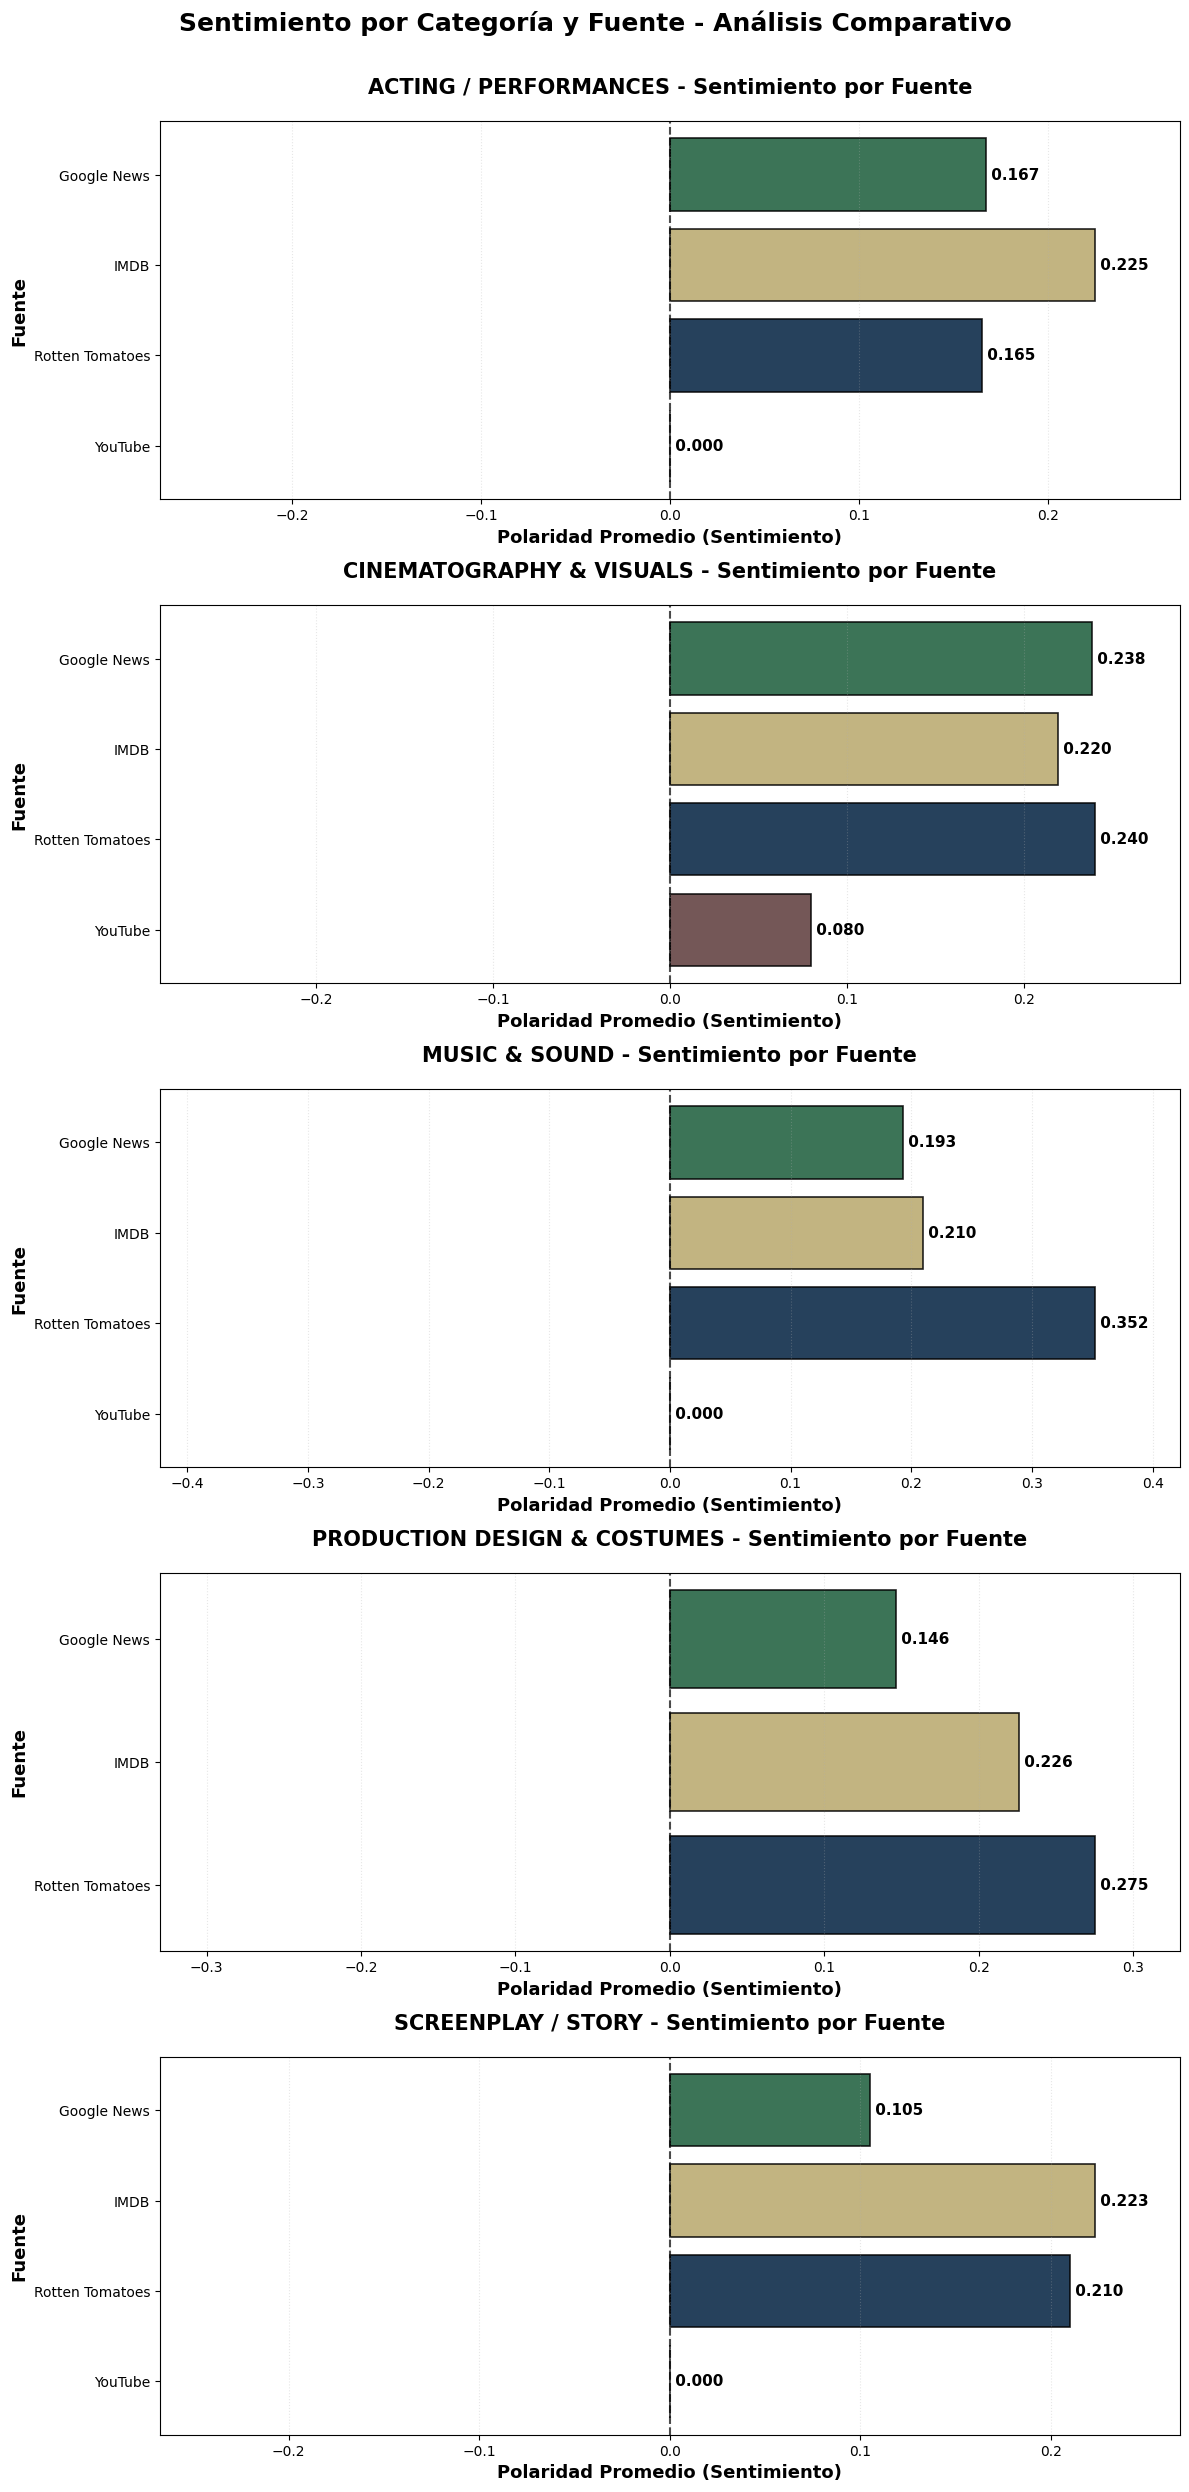

In [17]:
"""
Análisis Comparativo de Sentimiento por Categorías
Fuentes: Rotten Tomatoes, Google News, IMDB, YouTube
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from collections import Counter
import numpy as np

class MultiSourceCategoryAnalyzer:
    def __init__(self, dictionary_file, source_files):
        self.dictionary_file = dictionary_file
        self.source_files = source_files
        self.categories = {}
        
        # PALETA DE COLORES PERSONALIZADA
        self.custom_palette = {
            'Rotten Tomatoes': '#001F3F',  # Azul oscuro
            'Google News': '#1A5C3A',      # Verde oscuro
            'IMDB': '#B8A76B',             # Dorado
            'YouTube': '#5C3A3A'           # Marrón
        }
        
    def load_dictionary(self):
        """Carga el diccionario de categorías"""
        print("📖 Cargando diccionario de categorías...")
        
        try:
            df_dict = pd.read_excel(self.dictionary_file, engine='openpyxl')
        except Exception as e:
            print(f"⚠️ Error: {e}")
            raise
        
        for column in df_dict.columns:
            category_name = str(column)
            words = df_dict[column].dropna().tolist()
            
            cleaned_words = []
            for word in words:
                word_str = str(word).lower().strip()
                if word_str not in ['nan', 'none', ''] and len(word_str) > 1:
                    cleaned_words.append(word_str)
            
            if cleaned_words:
                self.categories[category_name] = cleaned_words
                print(f"  ✓ {category_name}: {len(cleaned_words)} palabras")
        
        print(f"\n📊 Total: {len(self.categories)} categorías\n")
        return self.categories
    
    def load_all_sources(self):
        """Carga datos de todas las fuentes"""
        print("📖 Cargando datos de todas las fuentes...")
        
        all_data = []
        
        for source_name, file_path in self.source_files.items():
            try:
                df = pd.read_excel(file_path)
                
                print(f"\n  🔍 {source_name} - Columnas disponibles:")
                print(f"     {', '.join(df.columns.tolist())}")
                
                # Identificar columna de texto según la fuente
                text_col = None
                
                # Intentar diferentes nombres de columnas
                possible_text_columns = [
                    'Texto', 'Text', 'text', 'Comment', 'comment',
                    'Review', 'review', 'Content', 'content',
                    'Titular', 'Title', 'title', 'Description', 'description'
                ]
                
                for col_name in possible_text_columns:
                    if col_name in df.columns:
                        text_col = col_name
                        break
                
                # Si no encuentra columna directa, combinar Title/Description o Titular/Description
                if not text_col:
                    if 'Titular' in df.columns:
                        # Google News - usar Titular (o combinar con Description si existe)
                        if 'Description' in df.columns:
                            df['text_combined'] = df['Titular'].fillna('') + ' ' + df['Description'].fillna('')
                        else:
                            df['text_combined'] = df['Titular'].fillna('')
                        text_col = 'text_combined'
                    elif 'Title' in df.columns and 'Description' in df.columns:
                        df['text_combined'] = df['Title'].fillna('') + ' ' + df['Description'].fillna('')
                        text_col = 'text_combined'
                
                if not text_col:
                    print(f"  ⚠️ {source_name}: No se encontró columna de texto")
                    print(f"     Intenté buscar: {', '.join(possible_text_columns)}")
                    continue
                
                # Crear DataFrame normalizado
                df_normalized = pd.DataFrame({
                    'Fuente': source_name,
                    'Texto': df[text_col]
                })
                
                all_data.append(df_normalized)
                print(f"  ✓ {source_name}: {len(df_normalized)} registros (columna: '{text_col}')")
                
            except Exception as e:
                print(f"  ⚠️ Error en {source_name}: {e}")
                continue
        
        if not all_data:
            raise ValueError("No se pudo cargar ninguna fuente de datos")
        
        df_all = pd.concat(all_data, ignore_index=True)
        print(f"\n📊 Total combinado: {len(df_all)} registros de {len(all_data)} fuentes\n")
        
        return df_all
    
    def clean_text(self, text):
        """Limpia texto"""
        if pd.isna(text) or text == 'N/A':
            return ""
        
        text = str(text).lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def classify_review(self, text):
        """Clasifica texto en categorías"""
        if not text:
            return []
        
        clean = self.clean_text(text)
        found_categories = []
        
        for category, words in self.categories.items():
            for word in words:
                word_str = str(word).strip()
                if not word_str or len(word_str) < 2:
                    continue
                
                pattern = r'\b' + re.escape(word_str) + r'\b'
                if re.search(pattern, clean):
                    found_categories.append(category)
                    break
        
        return found_categories
    
    def analyze_sentiment(self, text):
        """Analiza sentimiento"""
        if not text:
            return 0
        
        try:
            blob = TextBlob(str(text))
            return blob.sentiment.polarity
        except:
            return 0
    
    def analyze_all_data(self, df_all):
        """Analiza todas las fuentes por categoría"""
        print("🔍 Analizando por categoría y fuente...")
        
        results = []
        
        for idx, row in df_all.iterrows():
            text_raw = row['Texto']
            
            if pd.isna(text_raw) or text_raw == 'N/A':
                text = ''
            else:
                text = str(text_raw)
            
            if text and len(text) > 0:
                categories = self.classify_review(text)
                polarity = self.analyze_sentiment(text)
                
                result = {
                    'Fuente': row['Fuente'],
                    'Texto': text[:100] + "..." if len(text) > 100 else text,
                    'Categorías': ', '.join(categories) if categories else 'Sin Categoría',
                    'Num_Categorías': len(categories),
                    'Polaridad': polarity
                }
                
                for category in self.categories.keys():
                    result[f'Cat_{category}'] = 1 if category in categories else 0
                
                results.append(result)
            
            if (idx + 1) % 200 == 0:
                print(f"  Procesados {idx + 1}/{len(df_all)}...")
        
        df_results = pd.DataFrame(results)
        print(f"  ✓ Completado: {len(df_results)} registros analizados\n")
        
        return df_results
    
    def generate_comparative_stats(self, df_results):
        """Genera estadísticas comparativas por categoría y fuente"""
        print("="*100)
        print("📊 ESTADÍSTICAS COMPARATIVAS POR CATEGORÍA Y FUENTE")
        print("="*100)
        print()
        
        stats_data = []
        
        for category in self.categories.keys():
            col_name = f'Cat_{category}'
            
            # Por cada fuente
            for source in df_results['Fuente'].unique():
                df_source = df_results[df_results['Fuente'] == source]
                df_cat = df_source[df_source[col_name] == 1]
                
                if len(df_cat) > 0:
                    stats_data.append({
                        'Categoría': category,
                        'Fuente': source,
                        'Num_Menciones': len(df_cat),
                        'Polaridad_Promedio': df_cat['Polaridad'].mean(),
                        '% de la Fuente': (len(df_cat) / len(df_source)) * 100
                    })
        
        df_stats = pd.DataFrame(stats_data)
        
        # Mostrar resumen
        for category in self.categories.keys():
            print(f"\n📌 {category}")
            print("-" * 100)
            df_cat = df_stats[df_stats['Categoría'] == category].sort_values('Num_Menciones', ascending=False)
            
            for _, row in df_cat.iterrows():
                print(f"  {row['Fuente']:20} | Menciones: {row['Num_Menciones']:4.0f} | "
                      f"Polaridad: {row['Polaridad_Promedio']:6.3f} | "
                      f"% Fuente: {row['% de la Fuente']:5.1f}%")
        
        return df_stats
    
    def save_results(self, df_results, df_stats):
        """Guarda resultados"""
        output_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Analisis_Multifuente_Categorias.xlsx"
        
        # Resumen por categoría y fuente
        pivot_menciones = df_stats.pivot(index='Categoría', columns='Fuente', values='Num_Menciones').fillna(0)
        pivot_sentimiento = df_stats.pivot(index='Categoría', columns='Fuente', values='Polaridad_Promedio').fillna(0)
        
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            df_stats.to_excel(writer, sheet_name='Estadísticas Detalladas', index=False)
            pivot_menciones.to_excel(writer, sheet_name='Menciones por Fuente')
            pivot_sentimiento.to_excel(writer, sheet_name='Sentimiento por Fuente')
            df_results.to_excel(writer, sheet_name='Todos los Datos', index=False)
        
        print("\n" + "="*100)
        print("💾 RESULTADOS GUARDADOS")
        print("="*100)
        print(f"📁 {output_file}\n")
    
    def create_visualizations(self, df_stats):
        """Crea visualizaciones de SOLO sentimiento por categoría y fuente"""
        
        # Obtener categorías únicas
        categories = sorted(df_stats['Categoría'].unique())
        
        # Figura vertical - un gráfico por categoría
        fig, axes = plt.subplots(len(categories), 1, figsize=(12, 5*len(categories)))
        
        if len(categories) == 1:
            axes = [axes]
        
        for idx, category in enumerate(categories):
            df_cat = df_stats[df_stats['Categoría'] == category].sort_values('Fuente')
            
            # Gráfico de barras de sentimiento
            ax = axes[idx]
            
            # Colores según la fuente
            colors = [self.custom_palette.get(s, '#999999') for s in df_cat['Fuente']]
            
            # Barras de sentimiento
            bars = ax.barh(df_cat['Fuente'], df_cat['Polaridad_Promedio'], 
                          color=colors, alpha=0.85, edgecolor='black', linewidth=1.2)
            
            # Línea de referencia en 0
            ax.axvline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
            
            # Configuración
            ax.set_xlabel('Polaridad Promedio (Sentimiento)', fontsize=13, fontweight='bold')
            ax.set_ylabel('Fuente', fontsize=13, fontweight='bold')
            ax.set_title(f'{category} - Sentimiento por Fuente', 
                        fontsize=15, fontweight='bold', pad=20)
            ax.grid(axis='x', alpha=0.3, linestyle=':')
            
            # Añadir valores en las barras
            for i, (bar, val) in enumerate(zip(bars, df_cat['Polaridad_Promedio'])):
                width = bar.get_width()
                # Posicionar texto a la derecha o izquierda según el valor
                if width >= 0:
                    ax.text(width, bar.get_y() + bar.get_height()/2, 
                           f' {val:.3f}', 
                           ha='left', va='center', fontsize=11, fontweight='bold')
                else:
                    ax.text(width, bar.get_y() + bar.get_height()/2, 
                           f'{val:.3f} ', 
                           ha='right', va='center', fontsize=11, fontweight='bold')
            
            # Invertir eje Y para que aparezcan en orden
            ax.invert_yaxis()
            
            # Ajustar límites del eje X para mejor visualización
            max_val = df_cat['Polaridad_Promedio'].abs().max()
            ax.set_xlim(-max_val * 1.2, max_val * 1.2)
        
        plt.suptitle('Sentimiento por Categoría y Fuente - Análisis Comparativo', 
                    fontsize=18, fontweight='bold', y=0.995)
        
        plt.tight_layout(rect=[0, 0, 1, 0.99])
        
        output_img = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_Multifuente_Sentimiento.png"
        plt.savefig(output_img, dpi=300, bbox_inches='tight')
        print(f"📊 {output_img}\n")
    
    def run_analysis(self):
        """Ejecuta análisis completo"""
        print("\n" + "="*100)
        print("🌐 ANÁLISIS MULTIFUENTE POR CATEGORÍAS")
        print("="*100)
        print()
        
        # Cargar diccionario
        self.load_dictionary()
        
        # Cargar todas las fuentes
        df_all = self.load_all_sources()
        
        # Analizar
        df_results = self.analyze_all_data(df_all)
        
        # Estadísticas comparativas
        df_stats = self.generate_comparative_stats(df_results)
        
        # Guardar
        self.save_results(df_results, df_stats)
        
        # Visualizar
        self.create_visualizations(df_stats)
        
        print("="*100)
        print("✅ ANÁLISIS COMPLETADO")
        print("="*100)


def main():
    """Función principal"""
    
    # Diccionario
    dictionary_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Análisis/Dictionary.xlsx"
    
    # Archivos de fuentes
    source_files = {
        'Rotten Tomatoes': "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/User_Reviews_20260214_143815.xlsx",
        'Google News': "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Datos/Frankenstein_Google_News.xlsx",
        'IMDB': "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Datos/frankenstein_reviews_IMDB.xlsx",
        'YouTube': "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Datos/youtube_comments_EnN6DL2Z7vA.xlsx"
    }
    
    analyzer = MultiSourceCategoryAnalyzer(dictionary_file, source_files)
    analyzer.run_analysis()


if __name__ == "__main__":
    main()

ANÁLISIS ULTRA MEJORADO - ROTTEN TOMATOES FRANKENSTEIN

📖 Leyendo: Top_Critics_20260214_153950.xlsx
   ✓ 803 reseñas
📖 Leyendo: User_Reviews_20260214_143815.xlsx
   ✓ 172 reseñas

📊 Total: 975 reseñas

👤 NOMBRES PROPIOS (detectados como unidad completa)
  guillermo del toro             →  113 veces
  jacob elordi                   →   50 veces
  mia goth                       →   39 veces
  mary shelley                   →   14 veces
  oscar isaac                    →    6 veces

🔤 PALABRAS INDIVIDUALES (excluidos nombres propios y palabras vacías)

Top 25:

  monster                   →  208 veces
  gothic                    →  136 veces
  gorgeous                  →  122 veces
  creature                  →  100 veces
  director                  →   89 veces
  creation                  →   86 veces
  netflix                   →   82 veces
  soul                      →   82 veces
  though                    →   81 veces
  creator                   →   81 veces
  project                

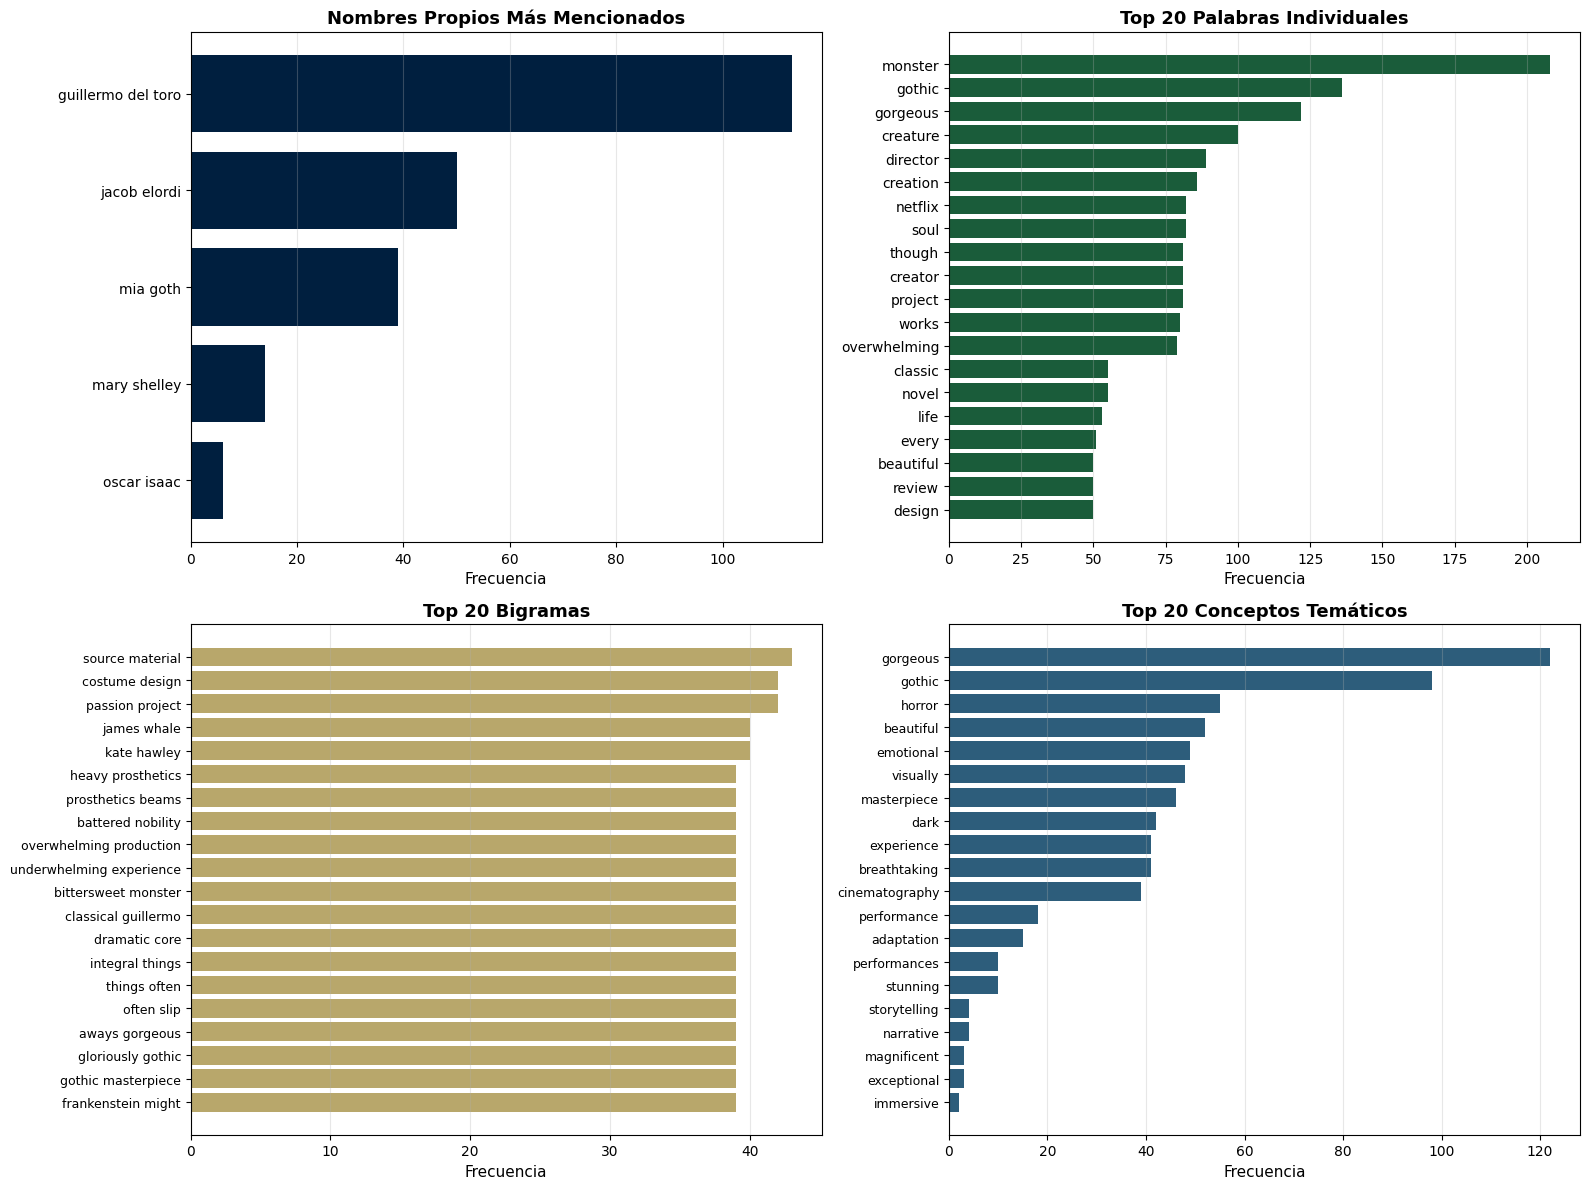

In [18]:
"""
Análisis ULTRA MEJORADO de palabras frecuentes
Con detección inteligente de nombres y filtrado de fragmentos sin sentido
"""

import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import matplotlib.pyplot as plt

try:
    nltk.data.find('corpora/stopwords')
except:
    nltk.download('stopwords', quiet=True)

class UltraReviewAnalyzer:
    def __init__(self, files):
        self.files = files
        self.stop_words = set(stopwords.words('english'))
        
        # STOPWORDS AMPLIADAS
        custom_stops = {
            # Palabras de cine
            'film', 'movie', 'films', 'movies', 'one', 'like', 'get', 'make', 
            'see', 'go', 'really', 'much', 'even', 'also', 'would', 'could', 
            'well', 'time', 'way', 'look', 'scene', 'scenes', 'story', 'stories',
            'year', 'years', 'watch', 'watching', 'watched', 'version', 'versions',
            
            # Palabras sueltas sin sentido
            'del', 'toro', 'has', 'been', 'always', 'still', 'many', 'full',
            'end', 'kind', 'feels', 'think', 'truly', 'half', 'hour', 'run',
            'underneath', 'the', 'and', 'this', 'that', 'these', 'those',
            'bare', 'bones', 'expected', 'conclusion', 'softens', 'edges',
            'vision', 'simplifying', 'complex', 'volatile', 'dynamic',
            'instead', 'shackled', 'trudging', 'through', 'remains',
            
            # Adjetivos muy genéricos
            'good', 'great', 'bad', 'best', 'better', 'worse', 'worst',
        }
        self.stop_words.update(custom_stops)
        
        # NOMBRES PROPIOS COMPLETOS (detectar y contar como unidad)
        self.proper_names = {
            'guillermo del toro': ['guillermo', 'del', 'toro'],
            'jacob elordi': ['jacob', 'elordi'],
            'mia goth': ['mia', 'goth'],
            'oscar isaac': ['oscar', 'isaac'],
            'christoph waltz': ['christoph', 'waltz'],
            'mary shelley': ['mary', 'shelley'],
            'victor frankenstein': ['victor', 'frankenstein'],
        }
        
        # CONCEPTOS TEMÁTICOS a buscar específicamente
        self.thematic_concepts = {
            # Experiencia
            'immersive', 'immersion', 'experience', 'experiential',
            
            # Atmósfera
            'atmospheric', 'atmosphere', 'visceral', 'gothic',
            
            # Calidad visual
            'stunning', 'breathtaking', 'spectacular', 'gorgeous',
            'beautiful', 'visually', 'cinematography',
            
            # Emocional
            'emotional', 'moving', 'powerful', 'touching',
            
            # Horror/Terror
            'horror', 'terrifying', 'scary', 'disturbing', 'dark',
            
            # Excelencia
            'masterpiece', 'brilliant', 'magnificent', 'exceptional',
            'outstanding', 'extraordinary',
            
            # Narrativa
            'storytelling', 'narrative', 'adaptation',
            
            # Performance
            'performance', 'performances', 'acting',
        }
    
    def load_reviews(self):
        """Carga archivos Excel"""
        all_texts = []
        for file in self.files:
            print(f"📖 Leyendo: {file.split('/')[-1]}")
            df = pd.read_excel(file)
            if 'Texto' in df.columns:
                texts = df['Texto'].dropna()
                all_texts.extend(texts.tolist())
                print(f"   ✓ {len(texts)} reseñas")
        print(f"\n📊 Total: {len(all_texts)} reseñas\n")
        return all_texts
    
    def clean_text(self, text):
        """Limpia texto"""
        text = text.lower()
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def detect_proper_names(self, texts):
        """Detecta y cuenta nombres propios completos"""
        name_counts = Counter()
        
        for text in texts:
            if text == 'N/A' or not isinstance(text, str):
                continue
            clean = self.clean_text(text)
            
            # Buscar cada nombre completo
            for full_name in self.proper_names.keys():
                if full_name in clean:
                    name_counts[full_name] += 1
        
        return name_counts
    
    def get_unigrams_ultra(self, texts):
        """Palabras individuales ultra-filtradas"""
        words = []
        
        for text in texts:
            if text == 'N/A' or not isinstance(text, str):
                continue
            
            clean = self.clean_text(text)
            
            # Eliminar palabras que son parte de nombres propios
            for name_parts in self.proper_names.values():
                for part in name_parts:
                    clean = re.sub(r'\b' + part + r'\b', '', clean)
            
            tokens = clean.split()
            
            # Filtrar: no stopwords, mínimo 4 letras, no números
            filtered = [w for w in tokens 
                       if w not in self.stop_words 
                       and len(w) >= 4
                       and not w.isdigit()
                       and w.isalpha()]  # Solo letras
            words.extend(filtered)
        
        return Counter(words)
    
    def get_bigrams_ultra(self, texts):
        """Bigramas ultra-filtrados - solo conceptos significativos"""
        bigram_list = []
        
        for text in texts:
            if text == 'N/A' or not isinstance(text, str):
                continue
            
            clean = self.clean_text(text)
            tokens = clean.split()
            bgs = list(ngrams(tokens, 2))
            
            for bg in bgs:
                # AMBAS palabras: no stopwords, mínimo 4 letras, solo letras
                if (bg[0] not in self.stop_words and 
                    bg[1] not in self.stop_words and
                    len(bg[0]) >= 4 and len(bg[1]) >= 4 and
                    bg[0].isalpha() and bg[1].isalpha()):
                    
                    bigram = ' '.join(bg)
                    # No incluir si es parte de un nombre propio
                    is_name_part = any(bigram in name for name in self.proper_names.keys())
                    if not is_name_part:
                        bigram_list.append(bigram)
        
        return Counter(bigram_list)
    
    def get_thematic_phrases(self, texts):
        """Busca frases temáticas específicas (más inteligente que trigramas ciegos)"""
        thematic_patterns = {
            # Patrones de diseño/producción
            'production design': 0,
            'costume design': 0,
            'production value': 0,
            'visual effects': 0,
            
            # Patrones narrativos
            'source material': 0,
            'original novel': 0,
            'classic tale': 0,
            'gothic horror': 0,
            'monster movie': 0,
            
            # Patrones de dirección
            'del toro vision': 0,
            'passion project': 0,
            'directorial vision': 0,
            
            # Patrones de actuación
            'standout performance': 0,
            'strong performance': 0,
            'remarkable performance': 0,
            
            # Patrones de calidad
            'beautifully crafted': 0,
            'visually stunning': 0,
            'emotionally resonant': 0,
            'deeply moving': 0,
        }
        
        for text in texts:
            if text == 'N/A' or not isinstance(text, str):
                continue
            clean = self.clean_text(text)
            
            for pattern in thematic_patterns.keys():
                if pattern in clean:
                    thematic_patterns[pattern] += 1
        
        # Solo devolver las que aparecen
        return {k: v for k, v in thematic_patterns.items() if v > 0}
    
    def search_concepts(self, texts):
        """Búsqueda de conceptos temáticos"""
        concept_counts = Counter()
        concept_contexts = {}
        
        for text in texts:
            if text == 'N/A' or not isinstance(text, str):
                continue
            clean = self.clean_text(text)
            
            for concept in self.thematic_concepts:
                if concept in clean:
                    concept_counts[concept] += 1
                    
                    # Guardar contexto (solo primeros 5 ejemplos)
                    if concept not in concept_contexts:
                        concept_contexts[concept] = []
                    
                    if len(concept_contexts[concept]) < 5:
                        idx = clean.find(concept)
                        start = max(0, idx - 40)
                        end = min(len(clean), idx + len(concept) + 40)
                        context = clean[start:end].strip()
                        concept_contexts[concept].append(context)
        
        return concept_counts, concept_contexts
    
    def analyze(self, top_n=25):
        """Análisis ultra-mejorado"""
        print("="*90)
        print("ANÁLISIS ULTRA MEJORADO - ROTTEN TOMATOES FRANKENSTEIN")
        print("="*90)
        print()
        
        texts = self.load_reviews()
        
        # 1. NOMBRES PROPIOS
        print("="*90)
        print("👤 NOMBRES PROPIOS (detectados como unidad completa)")
        print("="*90)
        names = self.detect_proper_names(texts)
        for name, count in names.most_common():
            print(f"  {name:30} → {count:4} veces")
        
        # 2. PALABRAS INDIVIDUALES
        print("\n" + "="*90)
        print("🔤 PALABRAS INDIVIDUALES (excluidos nombres propios y palabras vacías)")
        print("="*90)
        unigrams = self.get_unigrams_ultra(texts)
        print(f"\nTop {top_n}:\n")
        for word, count in unigrams.most_common(top_n):
            print(f"  {word:25} → {count:4} veces")
        
        # 3. BIGRAMAS
        print("\n" + "="*90)
        print("🔤🔤 BIGRAMAS SIGNIFICATIVOS")
        print("="*90)
        bigrams = self.get_bigrams_ultra(texts)
        print(f"\nTop {top_n}:\n")
        for bigram, count in bigrams.most_common(top_n):
            print(f"  {bigram:35} → {count:4} veces")
        
        # 4. FRASES TEMÁTICAS
        print("\n" + "="*90)
        print("💬 FRASES TEMÁTICAS ESPECÍFICAS")
        print("="*90)
        phrases = self.get_thematic_phrases(texts)
        if phrases:
            for phrase, count in sorted(phrases.items(), key=lambda x: x[1], reverse=True):
                print(f"  {phrase:35} → {count:4} veces")
        else:
            print("  (Ninguna frase temática encontrada)")
        
        # 5. CONCEPTOS TEMÁTICOS
        print("\n" + "="*90)
        print("🎯 CONCEPTOS TEMÁTICOS Y DESCRIPTIVOS")
        print("="*90)
        concepts, contexts = self.search_concepts(texts)
        
        if concepts:
            for concept, count in concepts.most_common(30):
                print(f"\n  {concept:25} → {count:4} veces")
                if concept in contexts and contexts[concept]:
                    print(f"    Ej: \"...{contexts[concept][0][:60]}...\"")
        
        # Guardar resultados
        self.save_results(names, unigrams, bigrams, phrases, concepts, top_n)
        self.create_visualizations(names, unigrams, bigrams, concepts)
    
    def save_results(self, names, unigrams, bigrams, phrases, concepts, top_n=50):
        """Guardar en Excel"""
        output = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Analisis_ULTRA_MEJORADO.xlsx"
        
        df_names = pd.DataFrame(names.most_common(), columns=['Nombre', 'Frecuencia'])
        df_uni = pd.DataFrame(unigrams.most_common(top_n), columns=['Palabra', 'Frecuencia'])
        df_bi = pd.DataFrame(bigrams.most_common(top_n), columns=['Bigrama', 'Frecuencia'])
        df_phrases = pd.DataFrame(sorted(phrases.items(), key=lambda x: x[1], reverse=True), 
                                  columns=['Frase Temática', 'Frecuencia'])
        df_concepts = pd.DataFrame(concepts.most_common(50), columns=['Concepto', 'Frecuencia'])
        
        with pd.ExcelWriter(output, engine='openpyxl') as writer:
            df_names.to_excel(writer, sheet_name='Nombres Propios', index=False)
            df_uni.to_excel(writer, sheet_name='Palabras', index=False)
            df_bi.to_excel(writer, sheet_name='Bigramas', index=False)
            df_phrases.to_excel(writer, sheet_name='Frases Temáticas', index=False)
            df_concepts.to_excel(writer, sheet_name='Conceptos', index=False)
        
        print("\n" + "="*90)
        print("💾 RESULTADOS GUARDADOS")
        print("="*90)
        print(f"📁 {output}")
    
    def create_visualizations(self, names, unigrams, bigrams, concepts, top_n=20):
        """Gráficos mejorados con paleta personalizada"""
        
        # PALETA DE COLORES PERSONALIZADA
        custom_palette = [
            '#001F3F',  # Azul oscuro
            '#5C6F5C',  # Verde grisáceo
            '#1A5C3A',  # Verde oscuro
            '#2D5D7B',  # Azul medio
            '#A0BCBC',  # Azul claro
            '#D4C5B0',  # Beige
            '#F5F5DC',  # Crema
            '#B8A76B',  # Dorado/mostaza
            '#5C3A3A',  # Marrón
            '#C5D3D8',  # Gris azulado claro
            '#E8E8E8'   # Gris muy claro
        ]
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Nombres propios
        if names:
            n_words, n_counts = zip(*names.most_common(min(top_n, len(names))))
            axes[0, 0].barh(range(len(n_words)), n_counts, color=custom_palette[0])
            axes[0, 0].set_yticks(range(len(n_words)))
            axes[0, 0].set_yticklabels(n_words, fontsize=10)
            axes[0, 0].invert_yaxis()
            axes[0, 0].set_xlabel('Frecuencia', fontsize=11)
            axes[0, 0].set_title('Nombres Propios Más Mencionados', fontsize=13, fontweight='bold')
            axes[0, 0].grid(axis='x', alpha=0.3)
        
        # 2. Palabras individuales
        words, counts = zip(*unigrams.most_common(top_n))
        axes[0, 1].barh(range(len(words)), counts, color=custom_palette[2])
        axes[0, 1].set_yticks(range(len(words)))
        axes[0, 1].set_yticklabels(words, fontsize=10)
        axes[0, 1].invert_yaxis()
        axes[0, 1].set_xlabel('Frecuencia', fontsize=11)
        axes[0, 1].set_title(f'Top {top_n} Palabras Individuales', fontsize=13, fontweight='bold')
        axes[0, 1].grid(axis='x', alpha=0.3)
        
        # 3. Bigramas
        bi_words, bi_counts = zip(*bigrams.most_common(top_n))
        axes[1, 0].barh(range(len(bi_words)), bi_counts, color=custom_palette[7])
        axes[1, 0].set_yticks(range(len(bi_words)))
        axes[1, 0].set_yticklabels(bi_words, fontsize=9)
        axes[1, 0].invert_yaxis()
        axes[1, 0].set_xlabel('Frecuencia', fontsize=11)
        axes[1, 0].set_title(f'Top {top_n} Bigramas', fontsize=13, fontweight='bold')
        axes[1, 0].grid(axis='x', alpha=0.3)
        
        # 4. Conceptos temáticos
        c_words, c_counts = zip(*concepts.most_common(top_n))
        axes[1, 1].barh(range(len(c_words)), c_counts, color=custom_palette[3])
        axes[1, 1].set_yticks(range(len(c_words)))
        axes[1, 1].set_yticklabels(c_words, fontsize=9)
        axes[1, 1].invert_yaxis()
        axes[1, 1].set_xlabel('Frecuencia', fontsize=11)
        axes[1, 1].set_title(f'Top {top_n} Conceptos Temáticos', fontsize=13, fontweight='bold')
        axes[1, 1].grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        
        output_img = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_ULTRA.png"
        plt.savefig(output_img, dpi=300, bbox_inches='tight')
        print(f"📊 {output_img}\n")


def main():
    files = [
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Top_Critics_20260214_153950.xlsx",
        "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/User_Reviews_20260214_143815.xlsx"
    ]
    
    analyzer = UltraReviewAnalyzer(files)
    analyzer.analyze(top_n=25)


if __name__ == "__main__":
    main()


🎭 ANÁLISIS DE SENTIMIENTO COMPARATIVO
Top Critics vs User Reviews - Frankenstein (2025)

📖 Cargando datos...
  ✓ Top Critics: 803 reseñas
  ✓ User Reviews: 173 reseñas

🔍 Analizando Top Critics...
  Procesadas 100/803 reseñas...
  Procesadas 200/803 reseñas...
  Procesadas 300/803 reseñas...
  Procesadas 400/803 reseñas...
  Procesadas 500/803 reseñas...
  Procesadas 600/803 reseñas...
  Procesadas 700/803 reseñas...
  Procesadas 800/803 reseñas...
  ✓ Completado: 803 reseñas analizadas

🔍 Analizando User Reviews...
  Procesadas 100/173 reseñas...
  ✓ Completado: 172 reseñas analizadas

📊 COMPARACIÓN DE SENTIMIENTOS

📈 POLARIDAD (de -1 negativo a +1 positivo)
------------------------------------------------------------------------------------------
Métrica                                 Top Critics         User Reviews
------------------------------------------------------------------------------------------
Promedio                                      0.147                0.182
Med

/var/folders/5r/7krzng8x559d8_3hglwspd1m0000gn/T/ipykernel_3265/1204831117.py:328: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 0].boxplot(data_box, labels=['Top Critics', 'User Reviews'],


📊 /Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_Sentimiento_Comparativo.png

✅ ANÁLISIS COMPLETADO


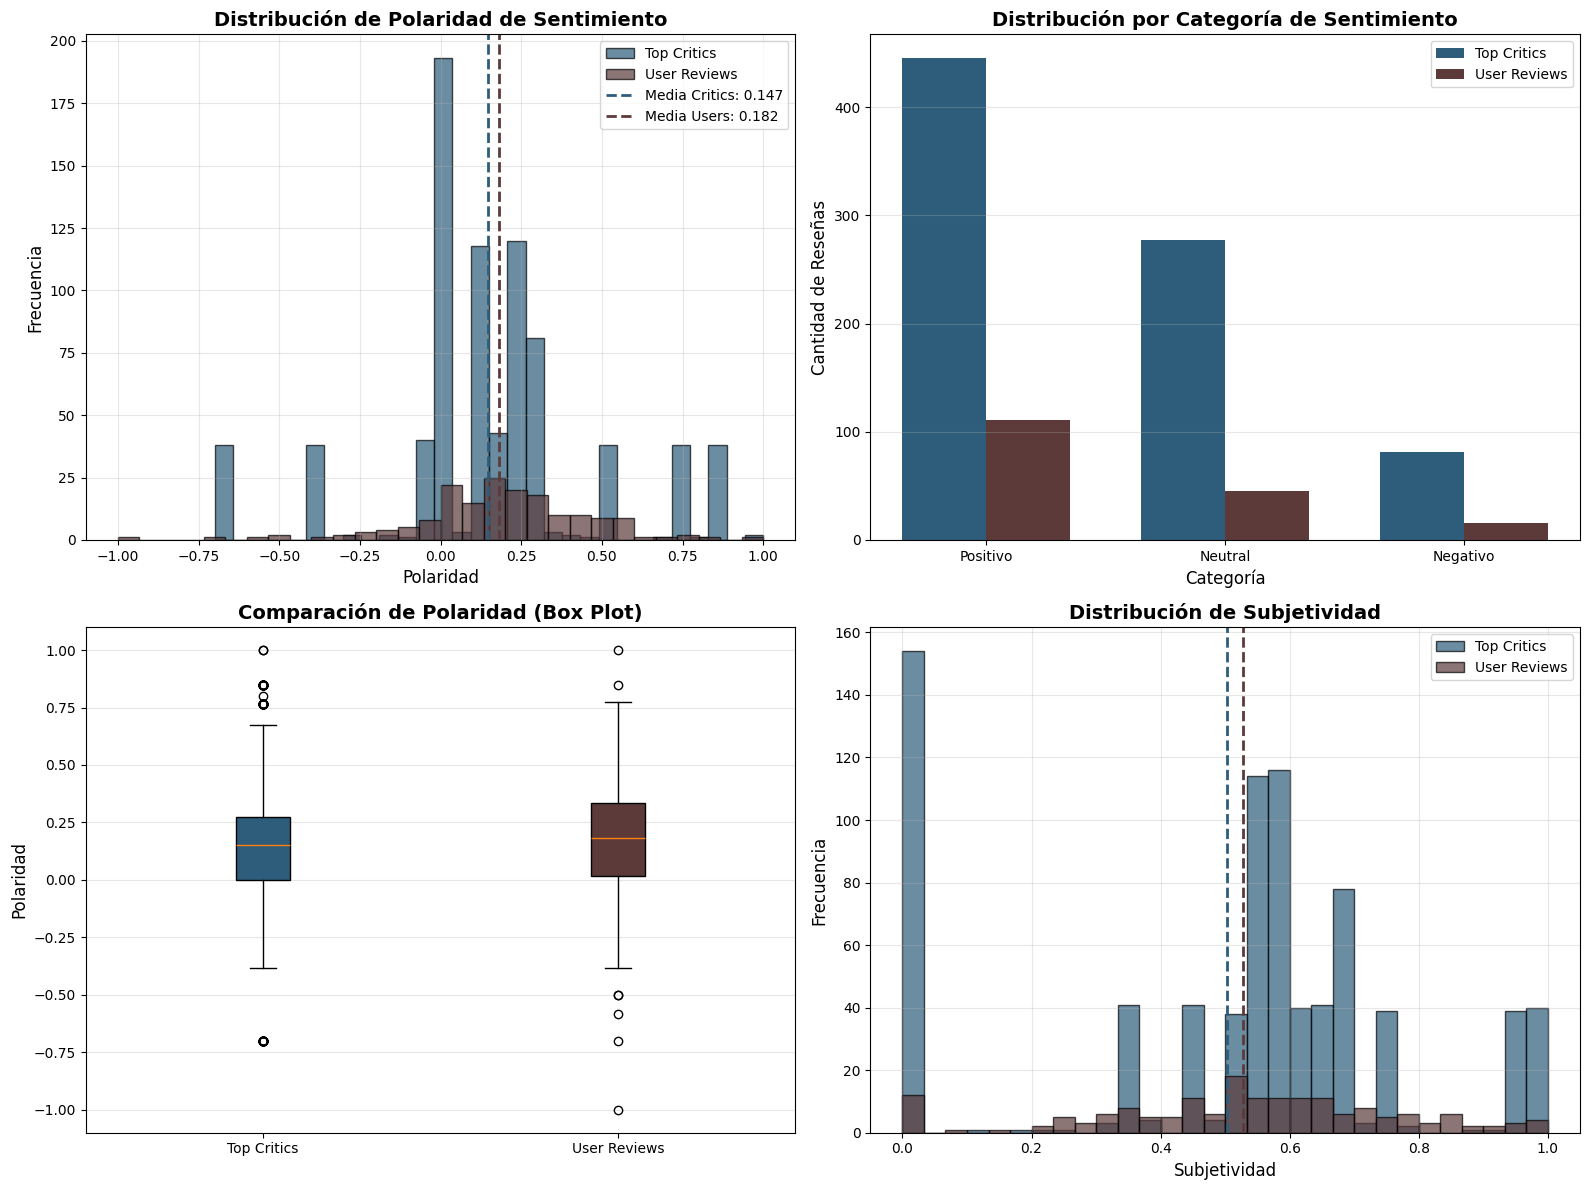

In [19]:
"""
Análisis de Sentimiento Comparativo: Top Critics vs User Reviews
Rotten Tomatoes - Frankenstein (2025)
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from collections import Counter

class SentimentAnalyzer:
    def __init__(self, critics_file, users_file):
        self.critics_file = critics_file
        self.users_file = users_file
        
    def load_data(self):
        """Carga los datos de ambos archivos"""
        print("📖 Cargando datos...")
        
        df_critics = pd.read_excel(self.critics_file)
        df_users = pd.read_excel(self.users_file)
        
        print(f"  ✓ Top Critics: {len(df_critics)} reseñas")
        print(f"  ✓ User Reviews: {len(df_users)} reseñas")
        print()
        
        return df_critics, df_users
    
    def clean_text(self, text):
        """Limpia el texto para análisis"""
        if pd.isna(text) or text == 'N/A':
            return ""
        
        text = str(text)
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def analyze_sentiment_textblob(self, text):
        """
        Analiza sentimiento con TextBlob
        Retorna: polaridad (-1 a 1) y subjetividad (0 a 1)
        """
        if not text:
            return 0, 0
        
        try:
            blob = TextBlob(text)
            return blob.sentiment.polarity, blob.sentiment.subjectivity
        except:
            return 0, 0
    
    def categorize_sentiment(self, polarity):
        """Categoriza la polaridad en Positivo/Neutral/Negativo"""
        if polarity > 0.1:
            return 'Positivo'
        elif polarity < -0.1:
            return 'Negativo'
        else:
            return 'Neutral'
    
    def analyze_group(self, df, group_name):
        """Analiza sentimiento de un grupo (Critics o Users)"""
        print(f"🔍 Analizando {group_name}...")
        
        sentiments = []
        
        for idx, row in df.iterrows():
            text = self.clean_text(row.get('Texto', ''))
            
            if text:
                polarity, subjectivity = self.analyze_sentiment_textblob(text)
                category = self.categorize_sentiment(polarity)
                
                sentiments.append({
                    'Texto': text[:100] + "..." if len(text) > 100 else text,
                    'Polaridad': polarity,
                    'Subjetividad': subjectivity,
                    'Categoría': category,
                    'Autor': row.get('Autor', 'N/A'),
                    'Fecha': row.get('Fecha', 'N/A')
                })
            
            if (idx + 1) % 100 == 0:
                print(f"  Procesadas {idx + 1}/{len(df)} reseñas...")
        
        df_sentiment = pd.DataFrame(sentiments)
        
        print(f"  ✓ Completado: {len(df_sentiment)} reseñas analizadas")
        print()
        
        return df_sentiment
    
    def compare_sentiments(self, df_critics_sent, df_users_sent):
        """Compara sentimientos entre grupos"""
        print("="*90)
        print("📊 COMPARACIÓN DE SENTIMIENTOS")
        print("="*90)
        print()
        
        # Estadísticas de polaridad
        print("📈 POLARIDAD (de -1 negativo a +1 positivo)")
        print("-" * 90)
        print(f"{'Métrica':<30} {'Top Critics':>20} {'User Reviews':>20}")
        print("-" * 90)
        
        critics_mean = df_critics_sent['Polaridad'].mean()
        users_mean = df_users_sent['Polaridad'].mean()
        
        critics_median = df_critics_sent['Polaridad'].median()
        users_median = df_users_sent['Polaridad'].median()
        
        critics_std = df_critics_sent['Polaridad'].std()
        users_std = df_users_sent['Polaridad'].std()
        
        print(f"{'Promedio':<30} {critics_mean:>20.3f} {users_mean:>20.3f}")
        print(f"{'Mediana':<30} {critics_median:>20.3f} {users_median:>20.3f}")
        print(f"{'Desviación Estándar':<30} {critics_std:>20.3f} {users_std:>20.3f}")
        print(f"{'Mínimo':<30} {df_critics_sent['Polaridad'].min():>20.3f} {df_users_sent['Polaridad'].min():>20.3f}")
        print(f"{'Máximo':<30} {df_critics_sent['Polaridad'].max():>20.3f} {df_users_sent['Polaridad'].max():>20.3f}")
        
        # Distribución por categoría
        print("\n" + "="*90)
        print("📊 DISTRIBUCIÓN POR CATEGORÍA")
        print("="*90)
        
        critics_dist = df_critics_sent['Categoría'].value_counts()
        users_dist = df_users_sent['Categoría'].value_counts()
        
        print(f"\n{'Categoría':<20} {'Top Critics':>20} {'%':>10} {'User Reviews':>20} {'%':>10}")
        print("-" * 90)
        
        for cat in ['Positivo', 'Neutral', 'Negativo']:
            c_count = critics_dist.get(cat, 0)
            u_count = users_dist.get(cat, 0)
            c_pct = (c_count / len(df_critics_sent)) * 100
            u_pct = (u_count / len(df_users_sent)) * 100
            
            print(f"{cat:<20} {c_count:>20} {c_pct:>9.1f}% {u_count:>20} {u_pct:>9.1f}%")
        
        # Subjetividad
        print("\n" + "="*90)
        print("📝 SUBJETIVIDAD (de 0 objetivo a 1 subjetivo)")
        print("="*90)
        
        critics_subj_mean = df_critics_sent['Subjetividad'].mean()
        users_subj_mean = df_users_sent['Subjetividad'].mean()
        
        print(f"\nPromedio Top Critics:   {critics_subj_mean:.3f}")
        print(f"Promedio User Reviews:  {users_subj_mean:.3f}")
        
        # Interpretación
        print("\n" + "="*90)
        print("💡 INTERPRETACIÓN")
        print("="*90)
        
        diff = users_mean - critics_mean
        
        if abs(diff) < 0.05:
            sentiment_comparison = "muy similar"
        elif diff > 0:
            sentiment_comparison = f"más positivo ({diff:.3f} puntos)"
        else:
            sentiment_comparison = f"más negativo ({abs(diff):.3f} puntos)"
        
        print(f"\n✓ El sentimiento de Users es {sentiment_comparison} que el de Critics")
        
        if critics_subj_mean > users_subj_mean:
            print(f"✓ Critics son más subjetivos ({critics_subj_mean - users_subj_mean:.3f} puntos)")
        else:
            print(f"✓ Users son más subjetivos ({users_subj_mean - critics_subj_mean:.3f} puntos)")
        
        print()
    
    def find_extreme_reviews(self, df_critics_sent, df_users_sent):
        """Encuentra las reseñas más positivas y negativas"""
        print("="*90)
        print("🔝 RESEÑAS MÁS EXTREMAS")
        print("="*90)
        
        # Top Critics - Más positiva
        print("\n📗 TOP CRITICS - Reseña más POSITIVA:")
        most_positive_critic = df_critics_sent.loc[df_critics_sent['Polaridad'].idxmax()]
        print(f"   Polaridad: {most_positive_critic['Polaridad']:.3f}")
        print(f"   Autor: {most_positive_critic['Autor']}")
        print(f"   Texto: \"{most_positive_critic['Texto']}\"")
        
        # Top Critics - Más negativa
        print("\n📕 TOP CRITICS - Reseña más NEGATIVA:")
        most_negative_critic = df_critics_sent.loc[df_critics_sent['Polaridad'].idxmin()]
        print(f"   Polaridad: {most_negative_critic['Polaridad']:.3f}")
        print(f"   Autor: {most_negative_critic['Autor']}")
        print(f"   Texto: \"{most_negative_critic['Texto']}\"")
        
        # Users - Más positiva
        print("\n📗 USERS - Reseña más POSITIVA:")
        most_positive_user = df_users_sent.loc[df_users_sent['Polaridad'].idxmax()]
        print(f"   Polaridad: {most_positive_user['Polaridad']:.3f}")
        print(f"   Autor: {most_positive_user['Autor']}")
        print(f"   Texto: \"{most_positive_user['Texto']}\"")
        
        # Users - Más negativa
        print("\n📕 USERS - Reseña más NEGATIVA:")
        most_negative_user = df_users_sent.loc[df_users_sent['Polaridad'].idxmin()]
        print(f"   Polaridad: {most_negative_user['Polaridad']:.3f}")
        print(f"   Autor: {most_negative_user['Autor']}")
        print(f"   Texto: \"{most_negative_user['Texto']}\"")
        print()
    
    def save_results(self, df_critics_sent, df_users_sent):
        """Guarda resultados en Excel"""
        output_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Analisis_Sentimiento_Comparativo.xlsx"
        
        # Añadir columna de grupo
        df_critics_sent['Grupo'] = 'Top Critics'
        df_users_sent['Grupo'] = 'User Reviews'
        
        # Combinar para comparativas
        df_combined = pd.concat([df_critics_sent, df_users_sent], ignore_index=True)
        
        # Estadísticas comparativas
        stats_data = {
            'Métrica': [
                'Promedio Polaridad', 'Mediana Polaridad', 'Desv. Est. Polaridad',
                'Promedio Subjetividad', '% Positivo', '% Neutral', '% Negativo',
                'Total Reseñas'
            ],
            'Top Critics': [
                df_critics_sent['Polaridad'].mean(),
                df_critics_sent['Polaridad'].median(),
                df_critics_sent['Polaridad'].std(),
                df_critics_sent['Subjetividad'].mean(),
                (df_critics_sent['Categoría'] == 'Positivo').sum() / len(df_critics_sent) * 100,
                (df_critics_sent['Categoría'] == 'Neutral').sum() / len(df_critics_sent) * 100,
                (df_critics_sent['Categoría'] == 'Negativo').sum() / len(df_critics_sent) * 100,
                len(df_critics_sent)
            ],
            'User Reviews': [
                df_users_sent['Polaridad'].mean(),
                df_users_sent['Polaridad'].median(),
                df_users_sent['Polaridad'].std(),
                df_users_sent['Subjetividad'].mean(),
                (df_users_sent['Categoría'] == 'Positivo').sum() / len(df_users_sent) * 100,
                (df_users_sent['Categoría'] == 'Neutral').sum() / len(df_users_sent) * 100,
                (df_users_sent['Categoría'] == 'Negativo').sum() / len(df_users_sent) * 100,
                len(df_users_sent)
            ]
        }
        
        df_stats = pd.DataFrame(stats_data)
        
        # Guardar en Excel
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            df_stats.to_excel(writer, sheet_name='Comparativa', index=False)
            df_critics_sent.to_excel(writer, sheet_name='Top Critics Detalle', index=False)
            df_users_sent.to_excel(writer, sheet_name='Users Detalle', index=False)
            df_combined.to_excel(writer, sheet_name='Todos Combinados', index=False)
        
        print("="*90)
        print("💾 RESULTADOS GUARDADOS")
        print("="*90)
        print(f"📁 {output_file}")
        print("\nHojas del Excel:")
        print("  1. Comparativa - Estadísticas lado a lado")
        print("  2. Top Critics Detalle - Análisis individual de cada reseña")
        print("  3. Users Detalle - Análisis individual de cada reseña")
        print("  4. Todos Combinados - Dataset completo para análisis adicional")
        print()
    
    def create_visualizations(self, df_critics_sent, df_users_sent):
        """Crea visualizaciones comparativas con paleta personalizada"""
        
        # PALETA DE COLORES PERSONALIZADA
        color_critics = '#2D5D7B'  # Azul medio
        color_users = '#5C3A3A'    # Marrón
        color_positive = '#1A5C3A'  # Verde oscuro
        color_neutral = '#C5D3D8'   # Gris azulado
        color_negative = '#5C3A3A'  # Marrón
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Distribución de Polaridad (Histogramas)
        axes[0, 0].hist(df_critics_sent['Polaridad'], bins=30, alpha=0.7, 
                       label='Top Critics', color=color_critics, edgecolor='black')
        axes[0, 0].hist(df_users_sent['Polaridad'], bins=30, alpha=0.7, 
                       label='User Reviews', color=color_users, edgecolor='black')
        axes[0, 0].axvline(df_critics_sent['Polaridad'].mean(), color=color_critics, 
                          linestyle='--', linewidth=2, 
                          label=f'Media Critics: {df_critics_sent["Polaridad"].mean():.3f}')
        axes[0, 0].axvline(df_users_sent['Polaridad'].mean(), color=color_users, 
                          linestyle='--', linewidth=2, 
                          label=f'Media Users: {df_users_sent["Polaridad"].mean():.3f}')
        axes[0, 0].set_xlabel('Polaridad', fontsize=12)
        axes[0, 0].set_ylabel('Frecuencia', fontsize=12)
        axes[0, 0].set_title('Distribución de Polaridad de Sentimiento', 
                            fontsize=14, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)
        
        # 2. Distribución por Categoría (Barras)
        critics_dist = df_critics_sent['Categoría'].value_counts()
        users_dist = df_users_sent['Categoría'].value_counts()
        
        categories = ['Positivo', 'Neutral', 'Negativo']
        critics_values = [critics_dist.get(cat, 0) for cat in categories]
        users_values = [users_dist.get(cat, 0) for cat in categories]
        
        x = range(len(categories))
        width = 0.35
        
        axes[0, 1].bar([i - width/2 for i in x], critics_values, width, 
                      label='Top Critics', color=color_critics)
        axes[0, 1].bar([i + width/2 for i in x], users_values, width, 
                      label='User Reviews', color=color_users)
        axes[0, 1].set_xlabel('Categoría', fontsize=12)
        axes[0, 1].set_ylabel('Cantidad de Reseñas', fontsize=12)
        axes[0, 1].set_title('Distribución por Categoría de Sentimiento', 
                            fontsize=14, fontweight='bold')
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(categories)
        axes[0, 1].legend()
        axes[0, 1].grid(axis='y', alpha=0.3)
        
        # 3. Box Plot de Polaridad
        data_box = [df_critics_sent['Polaridad'], df_users_sent['Polaridad']]
        bp = axes[1, 0].boxplot(data_box, labels=['Top Critics', 'User Reviews'], 
                               patch_artist=True)
        bp['boxes'][0].set_facecolor(color_critics)
        bp['boxes'][1].set_facecolor(color_users)
        axes[1, 0].set_ylabel('Polaridad', fontsize=12)
        axes[1, 0].set_title('Comparación de Polaridad (Box Plot)', 
                            fontsize=14, fontweight='bold')
        axes[1, 0].grid(axis='y', alpha=0.3)
        
        # 4. Subjetividad
        axes[1, 1].hist(df_critics_sent['Subjetividad'], bins=30, alpha=0.7, 
                       label='Top Critics', color=color_critics, edgecolor='black')
        axes[1, 1].hist(df_users_sent['Subjetividad'], bins=30, alpha=0.7, 
                       label='User Reviews', color=color_users, edgecolor='black')
        axes[1, 1].axvline(df_critics_sent['Subjetividad'].mean(), 
                          color=color_critics, linestyle='--', linewidth=2)
        axes[1, 1].axvline(df_users_sent['Subjetividad'].mean(), 
                          color=color_users, linestyle='--', linewidth=2)
        axes[1, 1].set_xlabel('Subjetividad', fontsize=12)
        axes[1, 1].set_ylabel('Frecuencia', fontsize=12)
        axes[1, 1].set_title('Distribución de Subjetividad', 
                            fontsize=14, fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
        
        plt.tight_layout()
        
        output_img = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_Sentimiento_Comparativo.png"
        plt.savefig(output_img, dpi=300, bbox_inches='tight')
        print(f"📊 {output_img}\n")
    
    def run_analysis(self):
        """Ejecuta el análisis completo"""
        print("\n" + "="*90)
        print("🎭 ANÁLISIS DE SENTIMIENTO COMPARATIVO")
        print("Top Critics vs User Reviews - Frankenstein (2025)")
        print("="*90)
        print()
        
        # Cargar datos
        df_critics, df_users = self.load_data()
        
        # Analizar cada grupo
        df_critics_sent = self.analyze_group(df_critics, "Top Critics")
        df_users_sent = self.analyze_group(df_users, "User Reviews")
        
        # Comparar
        self.compare_sentiments(df_critics_sent, df_users_sent)
        
        # Reseñas extremas
        self.find_extreme_reviews(df_critics_sent, df_users_sent)
        
        # Guardar resultados
        self.save_results(df_critics_sent, df_users_sent)
        
        # Crear visualizaciones
        self.create_visualizations(df_critics_sent, df_users_sent)
        
        print("="*90)
        print("✅ ANÁLISIS COMPLETADO")
        print("="*90)


def main():
    """Función principal"""
    
    # Primero instalar textblob si no está
    try:
        import textblob
    except ImportError:
        print("⚠️ Instalando textblob...")
        import subprocess
        subprocess.check_call(['pip', 'install', 'textblob'])
        print("✓ textblob instalado\n")
    
    critics_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Top_Critics_20260214_153950.xlsx"
    users_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/User_Reviews_20260214_143815.xlsx"
    
    analyzer = SentimentAnalyzer(critics_file, users_file)
    analyzer.run_analysis()


if __name__ == "__main__":
    main()

In [ ]:
"""
Análisis de Sentimiento Comparativo: Top Critics vs User Reviews
Rotten Tomatoes - Frankenstein (2025)
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from collections import Counter

class SentimentAnalyzer:
    def __init__(self, critics_file, users_file):
        self.critics_file = critics_file
        self.users_file = users_file
        
    def load_data(self):
        """Carga los datos de ambos archivos"""
        print("📖 Cargando datos...")
        
        df_critics = pd.read_excel(self.critics_file)
        df_users = pd.read_excel(self.users_file)
        
        print(f"  ✓ Top Critics: {len(df_critics)} reseñas")
        print(f"  ✓ User Reviews: {len(df_users)} reseñas")
        print()
        
        return df_critics, df_users
    
    def clean_text(self, text):
        """Limpia el texto para análisis"""
        if pd.isna(text) or text == 'N/A':
            return ""
        
        text = str(text)
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def analyze_sentiment_textblob(self, text):
        """
        Analiza sentimiento con TextBlob
        Retorna: polaridad (-1 a 1) y subjetividad (0 a 1)
        """
        if not text:
            return 0, 0
        
        try:
            blob = TextBlob(text)
            return blob.sentiment.polarity, blob.sentiment.subjectivity
        except:
            return 0, 0
    
    def categorize_sentiment(self, polarity):
        """Categoriza la polaridad en Positivo/Neutral/Negativo"""
        if polarity > 0.1:
            return 'Positivo'
        elif polarity < -0.1:
            return 'Negativo'
        else:
            return 'Neutral'
    
    def analyze_group(self, df, group_name):
        """Analiza sentimiento de un grupo (Critics o Users)"""
        print(f"🔍 Analizando {group_name}...")
        
        sentiments = []
        
        for idx, row in df.iterrows():
            text = self.clean_text(row.get('Texto', ''))
            
            if text:
                polarity, subjectivity = self.analyze_sentiment_textblob(text)
                category = self.categorize_sentiment(polarity)
                
                sentiments.append({
                    'Texto': text[:100] + "..." if len(text) > 100 else text,
                    'Polaridad': polarity,
                    'Subjetividad': subjectivity,
                    'Categoría': category,
                    'Autor': row.get('Autor', 'N/A'),
                    'Fecha': row.get('Fecha', 'N/A')
                })
            
            if (idx + 1) % 100 == 0:
                print(f"  Procesadas {idx + 1}/{len(df)} reseñas...")
        
        df_sentiment = pd.DataFrame(sentiments)
        
        print(f"  ✓ Completado: {len(df_sentiment)} reseñas analizadas")
        print()
        
        return df_sentiment
    
    def compare_sentiments(self, df_critics_sent, df_users_sent):
        """Compara sentimientos entre grupos"""
        print("="*90)
        print("📊 COMPARACIÓN DE SENTIMIENTOS")
        print("="*90)
        print()
        
        # Estadísticas de polaridad
        print("📈 POLARIDAD (de -1 negativo a +1 positivo)")
        print("-" * 90)
        print(f"{'Métrica':<30} {'Top Critics':>20} {'User Reviews':>20}")
        print("-" * 90)
        
        critics_mean = df_critics_sent['Polaridad'].mean()
        users_mean = df_users_sent['Polaridad'].mean()
        
        critics_median = df_critics_sent['Polaridad'].median()
        users_median = df_users_sent['Polaridad'].median()
        
        critics_std = df_critics_sent['Polaridad'].std()
        users_std = df_users_sent['Polaridad'].std()
        
        print(f"{'Promedio':<30} {critics_mean:>20.3f} {users_mean:>20.3f}")
        print(f"{'Mediana':<30} {critics_median:>20.3f} {users_median:>20.3f}")
        print(f"{'Desviación Estándar':<30} {critics_std:>20.3f} {users_std:>20.3f}")
        print(f"{'Mínimo':<30} {df_critics_sent['Polaridad'].min():>20.3f} {df_users_sent['Polaridad'].min():>20.3f}")
        print(f"{'Máximo':<30} {df_critics_sent['Polaridad'].max():>20.3f} {df_users_sent['Polaridad'].max():>20.3f}")
        
        # Distribución por categoría
        print("\n" + "="*90)
        print("📊 DISTRIBUCIÓN POR CATEGORÍA")
        print("="*90)
        
        critics_dist = df_critics_sent['Categoría'].value_counts()
        users_dist = df_users_sent['Categoría'].value_counts()
        
        print(f"\n{'Categoría':<20} {'Top Critics':>20} {'%':>10} {'User Reviews':>20} {'%':>10}")
        print("-" * 90)
        
        for cat in ['Positivo', 'Neutral', 'Negativo']:
            c_count = critics_dist.get(cat, 0)
            u_count = users_dist.get(cat, 0)
            c_pct = (c_count / len(df_critics_sent)) * 100
            u_pct = (u_count / len(df_users_sent)) * 100
            
            print(f"{cat:<20} {c_count:>20} {c_pct:>9.1f}% {u_count:>20} {u_pct:>9.1f}%")
        
        # Subjetividad
        print("\n" + "="*90)
        print("📝 SUBJETIVIDAD (de 0 objetivo a 1 subjetivo)")
        print("="*90)
        
        critics_subj_mean = df_critics_sent['Subjetividad'].mean()
        users_subj_mean = df_users_sent['Subjetividad'].mean()
        
        print(f"\nPromedio Top Critics:   {critics_subj_mean:.3f}")
        print(f"Promedio User Reviews:  {users_subj_mean:.3f}")
        
        # Interpretación
        print("\n" + "="*90)
        print("💡 INTERPRETACIÓN")
        print("="*90)
        
        diff = users_mean - critics_mean
        
        if abs(diff) < 0.05:
            sentiment_comparison = "muy similar"
        elif diff > 0:
            sentiment_comparison = f"más positivo ({diff:.3f} puntos)"
        else:
            sentiment_comparison = f"más negativo ({abs(diff):.3f} puntos)"
        
        print(f"\n✓ El sentimiento de Users es {sentiment_comparison} que el de Critics")
        
        if critics_subj_mean > users_subj_mean:
            print(f"✓ Critics son más subjetivos ({critics_subj_mean - users_subj_mean:.3f} puntos)")
        else:
            print(f"✓ Users son más subjetivos ({users_subj_mean - critics_subj_mean:.3f} puntos)")
        
        print()
    
    def find_extreme_reviews(self, df_critics_sent, df_users_sent):
        """Encuentra las reseñas más positivas y negativas"""
        print("="*90)
        print("🔝 RESEÑAS MÁS EXTREMAS")
        print("="*90)
        
        # Top Critics - Más positiva
        print("\n📗 TOP CRITICS - Reseña más POSITIVA:")
        most_positive_critic = df_critics_sent.loc[df_critics_sent['Polaridad'].idxmax()]
        print(f"   Polaridad: {most_positive_critic['Polaridad']:.3f}")
        print(f"   Autor: {most_positive_critic['Autor']}")
        print(f"   Texto: \"{most_positive_critic['Texto']}\"")
        
        # Top Critics - Más negativa
        print("\n📕 TOP CRITICS - Reseña más NEGATIVA:")
        most_negative_critic = df_critics_sent.loc[df_critics_sent['Polaridad'].idxmin()]
        print(f"   Polaridad: {most_negative_critic['Polaridad']:.3f}")
        print(f"   Autor: {most_negative_critic['Autor']}")
        print(f"   Texto: \"{most_negative_critic['Texto']}\"")
        
        # Users - Más positiva
        print("\n📗 USERS - Reseña más POSITIVA:")
        most_positive_user = df_users_sent.loc[df_users_sent['Polaridad'].idxmax()]
        print(f"   Polaridad: {most_positive_user['Polaridad']:.3f}")
        print(f"   Autor: {most_positive_user['Autor']}")
        print(f"   Texto: \"{most_positive_user['Texto']}\"")
        
        # Users - Más negativa
        print("\n📕 USERS - Reseña más NEGATIVA:")
        most_negative_user = df_users_sent.loc[df_users_sent['Polaridad'].idxmin()]
        print(f"   Polaridad: {most_negative_user['Polaridad']:.3f}")
        print(f"   Autor: {most_negative_user['Autor']}")
        print(f"   Texto: \"{most_negative_user['Texto']}\"")
        print()
    
    def save_results(self, df_critics_sent, df_users_sent):
        """Guarda resultados en Excel"""
        output_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Analisis_Sentimiento_Comparativo.xlsx"
        
        # Añadir columna de grupo
        df_critics_sent['Grupo'] = 'Top Critics'
        df_users_sent['Grupo'] = 'User Reviews'
        
        # Combinar para comparativas
        df_combined = pd.concat([df_critics_sent, df_users_sent], ignore_index=True)
        
        # Estadísticas comparativas
        stats_data = {
            'Métrica': [
                'Promedio Polaridad', 'Mediana Polaridad', 'Desv. Est. Polaridad',
                'Promedio Subjetividad', '% Positivo', '% Neutral', '% Negativo',
                'Total Reseñas'
            ],
            'Top Critics': [
                df_critics_sent['Polaridad'].mean(),
                df_critics_sent['Polaridad'].median(),
                df_critics_sent['Polaridad'].std(),
                df_critics_sent['Subjetividad'].mean(),
                (df_critics_sent['Categoría'] == 'Positivo').sum() / len(df_critics_sent) * 100,
                (df_critics_sent['Categoría'] == 'Neutral').sum() / len(df_critics_sent) * 100,
                (df_critics_sent['Categoría'] == 'Negativo').sum() / len(df_critics_sent) * 100,
                len(df_critics_sent)
            ],
            'User Reviews': [
                df_users_sent['Polaridad'].mean(),
                df_users_sent['Polaridad'].median(),
                df_users_sent['Polaridad'].std(),
                df_users_sent['Subjetividad'].mean(),
                (df_users_sent['Categoría'] == 'Positivo').sum() / len(df_users_sent) * 100,
                (df_users_sent['Categoría'] == 'Neutral').sum() / len(df_users_sent) * 100,
                (df_users_sent['Categoría'] == 'Negativo').sum() / len(df_users_sent) * 100,
                len(df_users_sent)
            ]
        }
        
        df_stats = pd.DataFrame(stats_data)
        
        # Guardar en Excel
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            df_stats.to_excel(writer, sheet_name='Comparativa', index=False)
            df_critics_sent.to_excel(writer, sheet_name='Top Critics Detalle', index=False)
            df_users_sent.to_excel(writer, sheet_name='Users Detalle', index=False)
            df_combined.to_excel(writer, sheet_name='Todos Combinados', index=False)
        
        print("="*90)
        print("💾 RESULTADOS GUARDADOS")
        print("="*90)
        print(f"📁 {output_file}")
        print("\nHojas del Excel:")
        print("  1. Comparativa - Estadísticas lado a lado")
        print("  2. Top Critics Detalle - Análisis individual de cada reseña")
        print("  3. Users Detalle - Análisis individual de cada reseña")
        print("  4. Todos Combinados - Dataset completo para análisis adicional")
        print()
    
    def create_visualizations(self, df_critics_sent, df_users_sent):
        """Crea visualizaciones comparativas con paleta personalizada"""
        
        # PALETA DE COLORES PERSONALIZADA
        color_critics = '#2D5D7B'  # Azul medio
        color_users = '#5C3A3A'    # Marrón
        color_positive = '#1A5C3A'  # Verde oscuro
        color_neutral = '#C5D3D8'   # Gris azulado
        color_negative = '#5C3A3A'  # Marrón
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Distribución de Polaridad (Histogramas)
        axes[0, 0].hist(df_critics_sent['Polaridad'], bins=30, alpha=0.7, 
                       label='Top Critics', color=color_critics, edgecolor='black')
        axes[0, 0].hist(df_users_sent['Polaridad'], bins=30, alpha=0.7, 
                       label='User Reviews', color=color_users, edgecolor='black')
        axes[0, 0].axvline(df_critics_sent['Polaridad'].mean(), color=color_critics, 
                          linestyle='--', linewidth=2, 
                          label=f'Media Critics: {df_critics_sent["Polaridad"].mean():.3f}')
        axes[0, 0].axvline(df_users_sent['Polaridad'].mean(), color=color_users, 
                          linestyle='--', linewidth=2, 
                          label=f'Media Users: {df_users_sent["Polaridad"].mean():.3f}')
        axes[0, 0].set_xlabel('Polaridad', fontsize=12)
        axes[0, 0].set_ylabel('Frecuencia', fontsize=12)
        axes[0, 0].set_title('Distribución de Polaridad de Sentimiento', 
                            fontsize=14, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)
        
        # 2. Distribución por Categoría (Barras)
        critics_dist = df_critics_sent['Categoría'].value_counts()
        users_dist = df_users_sent['Categoría'].value_counts()
        
        categories = ['Positivo', 'Neutral', 'Negativo']
        critics_values = [critics_dist.get(cat, 0) for cat in categories]
        users_values = [users_dist.get(cat, 0) for cat in categories]
        
        x = range(len(categories))
        width = 0.35
        
        axes[0, 1].bar([i - width/2 for i in x], critics_values, width, 
                      label='Top Critics', color=color_critics)
        axes[0, 1].bar([i + width/2 for i in x], users_values, width, 
                      label='User Reviews', color=color_users)
        axes[0, 1].set_xlabel('Categoría', fontsize=12)
        axes[0, 1].set_ylabel('Cantidad de Reseñas', fontsize=12)
        axes[0, 1].set_title('Distribución por Categoría de Sentimiento', 
                            fontsize=14, fontweight='bold')
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(categories)
        axes[0, 1].legend()
        axes[0, 1].grid(axis='y', alpha=0.3)
        
        # 3. Box Plot de Polaridad
        data_box = [df_critics_sent['Polaridad'], df_users_sent['Polaridad']]
        bp = axes[1, 0].boxplot(data_box, labels=['Top Critics', 'User Reviews'], 
                               patch_artist=True)
        bp['boxes'][0].set_facecolor(color_critics)
        bp['boxes'][1].set_facecolor(color_users)
        axes[1, 0].set_ylabel('Polaridad', fontsize=12)
        axes[1, 0].set_title('Comparación de Polaridad (Box Plot)', 
                            fontsize=14, fontweight='bold')
        axes[1, 0].grid(axis='y', alpha=0.3)
        
        # 4. Subjetividad
        axes[1, 1].hist(df_critics_sent['Subjetividad'], bins=30, alpha=0.7, 
                       label='Top Critics', color=color_critics, edgecolor='black')
        axes[1, 1].hist(df_users_sent['Subjetividad'], bins=30, alpha=0.7, 
                       label='User Reviews', color=color_users, edgecolor='black')
        axes[1, 1].axvline(df_critics_sent['Subjetividad'].mean(), 
                          color=color_critics, linestyle='--', linewidth=2)
        axes[1, 1].axvline(df_users_sent['Subjetividad'].mean(), 
                          color=color_users, linestyle='--', linewidth=2)
        axes[1, 1].set_xlabel('Subjetividad', fontsize=12)
        axes[1, 1].set_ylabel('Frecuencia', fontsize=12)
        axes[1, 1].set_title('Distribución de Subjetividad', 
                            fontsize=14, fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
        
        plt.tight_layout()
        
        output_img = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Graficos_Sentimiento_Comparativo.png"
        plt.savefig(output_img, dpi=300, bbox_inches='tight')
        print(f"📊 {output_img}\n")
    
    def run_analysis(self):
        """Ejecuta el análisis completo"""
        print("\n" + "="*90)
        print("🎭 ANÁLISIS DE SENTIMIENTO COMPARATIVO")
        print("Top Critics vs User Reviews - Frankenstein (2025)")
        print("="*90)
        print()
        
        # Cargar datos
        df_critics, df_users = self.load_data()
        
        # Analizar cada grupo
        df_critics_sent = self.analyze_group(df_critics, "Top Critics")
        df_users_sent = self.analyze_group(df_users, "User Reviews")
        
        # Comparar
        self.compare_sentiments(df_critics_sent, df_users_sent)
        
        # Reseñas extremas
        self.find_extreme_reviews(df_critics_sent, df_users_sent)
        
        # Guardar resultados
        self.save_results(df_critics_sent, df_users_sent)
        
        # Crear visualizaciones
        self.create_visualizations(df_critics_sent, df_users_sent)
        
        print("="*90)
        print("✅ ANÁLISIS COMPLETADO")
        print("="*90)


def main():
    """Función principal"""
    
    # Primero instalar textblob si no está
    try:
        import textblob
    except ImportError:
        print("⚠️ Instalando textblob...")
        import subprocess
        subprocess.check_call(['pip', 'install', 'textblob'])
        print("✓ textblob instalado\n")
    
    critics_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/Top_Critics_20260214_153950.xlsx"
    users_file = "/Users/allende/Desktop/5 ICAI /Segundo cuatri/Analítica Social y de la Web /Trabajo Práctico /Datos/Rotten Tomatoes/User_Reviews_20260214_143815.xlsx"
    
    analyzer = SentimentAnalyzer(critics_file, users_file)
    analyzer.run_analysis()


if __name__ == "__main__":
    main()